In [1]:
#Importing the libraries-
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib 
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the data -
house_price_1 = pd.read_excel("innercity.xlsx")
house_price_1.head()

cid         dayhours   price  room_bed  room_bath  living_measure  \
0  3876100940  20150427T000000  600000       4.0       1.75          3050.0   
1  3145600250  20150317T000000  190000       2.0       1.00           670.0   
2  7129303070  20140820T000000  735000       4.0       2.75          3040.0   
3  7338220280  20141010T000000  257000       3.0       2.50          1740.0   
4  7950300670  20150218T000000  450000       2.0       1.00          1120.0   

   lot_measure ceil coast  sight  ... basement  yr_built  yr_renovated  \
0       9440.0    1     0    0.0  ...   1250.0      1966             0   
1       3101.0    1     0    0.0  ...      0.0      1948             0   
2       2415.0    2     1    4.0  ...      0.0      1966             0   
3       3721.0    2     0    0.0  ...      0.0      2009             0   
4       4590.0    1     0    0.0  ...      0.0      1924             0   

   zipcode      lat     long  living_measure15  lot_measure15 furnished  \
0    98034  47.7228 -122.183            2020.0         8660.0       0.0   
1    98118  47.5546 -122.274            1660.0         4100.0       0.0   
2    98118  47.5188 -122.256            2620.0         2433.0       0.0   
3    98002  47.3363 -122.213            2030.0         3794.0       0.0   
4    98118  47.5663 -122.285            1120.0         5100.0       0.0   

   total_area  
0       12490  
1        3771  
2        5455  
3        5461  
4        5710  

[5 rows x 23 columns]

In [3]:
pd.options.display.max_columns = None

In [4]:
#sample of the data -
house_price_1.head().T

0                1                2  \
cid                    3876100940       3145600250       7129303070   
dayhours          20150427T000000  20150317T000000  20140820T000000   
price                      600000           190000           735000   
room_bed                      4.0              2.0              4.0   
room_bath                    1.75              1.0             2.75   
living_measure             3050.0            670.0           3040.0   
lot_measure                9440.0           3101.0           2415.0   
ceil                            1                1                2   
coast                           0                0                1   
sight                         0.0              0.0              4.0   
condition                       3                4                3   
quality                       8.0              6.0              8.0   
ceil_measure               1800.0            670.0           3040.0   
basement                   1250.0              0.0              0.0   
yr_built                     1966             1948             1966   
yr_renovated                    0                0                0   
zipcode                     98034            98118            98118   
lat                       47.7228          47.5546          47.5188   
long                     -122.183         -122.274         -122.256   
living_measure15           2020.0           1660.0           2620.0   
lot_measure15              8660.0           4100.0           2433.0   
furnished                     0.0              0.0              0.0   
total_area                  12490             3771             5455   

                                3                4  
cid                    7338220280       7950300670  
dayhours          20141010T000000  20150218T000000  
price                      257000           450000  
room_bed                      3.0              2.0  
room_bath                     2.5              1.0  
living_measure             1740.0           1120.0  
lot_measure                3721.0           4590.0  
ceil                            2                1  
coast                           0                0  
sight                         0.0              0.0  
condition                       3                3  
quality                       8.0              7.0  
ceil_measure               1740.0           1120.0  
basement                      0.0              0.0  
yr_built                     2009             1924  
yr_renovated                    0                0  
zipcode                     98002            98118  
lat                       47.3363          47.5663  
long                     -122.213         -122.285  
living_measure15           2030.0           1120.0  
lot_measure15              3794.0           5100.0  
furnished                     0.0              0.0  
total_area                   5461             5710

In [5]:
#shape of the data -
house_price_1.shape

(21613, 23)

In [6]:
house_price_1['dayhours'] =  pd.to_datetime(house_price_1['dayhours'])

In [7]:
house_price_1.rename(columns = {'dayhours':'date_house_sold'}, inplace = True)

In [8]:
house_price_1["date_house_sold"] = house_price_1["date_house_sold"].astype('datetime64')

In [9]:
house_price_1["ceil"] = house_price_1['ceil'].replace('$',0)

In [10]:
house_price_1["coast"] = house_price_1['coast'].replace('$',0)

In [11]:
house_price_1["condition"] = house_price_1['condition'].replace('$',0)

In [12]:
house_price_1["yr_built"] = house_price_1['yr_built'].replace('$',0)

In [13]:
house_price_1["long"] = house_price_1['long'].replace('$',0)

In [14]:
house_price_1["total_area"] = house_price_1['total_area'].replace('$',0)

In [15]:
house_price_1.describe().apply(lambda s: s.apply('{0:.5f}'.format)).T

count              mean               std  \
cid               21613.00000  4580301520.86499  2876565571.31205   
price             21613.00000      540182.15879      367362.23172   
room_bed          21505.00000           3.37136           0.93029   
room_bath         21505.00000           2.11517           0.77025   
living_measure    21596.00000        2079.86076         918.49612   
lot_measure       21571.00000       15104.58328       41423.61939   
ceil              21571.00000           1.49205           0.54240   
coast             21612.00000           0.00745           0.08599   
sight             21556.00000           0.23437           0.76644   
condition         21556.00000           3.40490           0.66178   
quality           21612.00000           7.65686           1.17548   
ceil_measure      21612.00000        1788.36656         828.10253   
basement          21612.00000         291.52253         442.58084   
yr_built          21612.00000        1969.73256          58.11458   
yr_renovated      21613.00000          84.40226         401.67924   
zipcode           21613.00000       98077.93980          53.50503   
lat               21613.00000          47.56005           0.13856   
long              21613.00000        -122.02159           4.84567   
living_measure15  21447.00000        1987.06556         685.51963   
lot_measure15     21584.00000       12766.54318       27286.98711   
furnished         21584.00000           0.19672           0.39753   
total_area        21584.00000       17160.97744       41597.46875   

                            min               25%               50%  \
cid               1000102.00000  2123049194.00000  3904930410.00000   
price               75000.00000      321950.00000      450000.00000   
room_bed                0.00000           3.00000           3.00000   
room_bath               0.00000           1.75000           2.25000   
living_measure        290.00000        1429.25000        1910.00000   
lot_measure           520.00000        5040.00000        7618.00000   
ceil                    0.00000           1.00000           1.50000   
coast                   0.00000           0.00000           0.00000   
sight                   0.00000           0.00000           0.00000   
condition               0.00000           3.00000           3.00000   
quality                 1.00000           7.00000           7.00000   
ceil_measure          290.00000        1190.00000        1560.00000   
basement                0.00000           0.00000           0.00000   
yr_built                0.00000        1951.00000        1975.00000   
yr_renovated            0.00000           0.00000           0.00000   
zipcode             98001.00000       98033.00000       98065.00000   
lat                    47.15590          47.47100          47.57180   
long                 -122.51900        -122.32800        -122.23000   
living_measure15      399.00000        1490.00000        1840.00000   
lot_measure15         651.00000        5100.00000        7620.00000   
furnished               0.00000           0.00000           0.00000   
total_area              0.00000        7020.00000        9562.50000   

                               75%               max  
cid               7308900445.00000  9900000190.00000  
price                 645000.00000     7700000.00000  
room_bed                   4.00000          33.00000  
room_bath                  2.50000           8.00000  
living_measure          2550.00000       13540.00000  
lot_measure            10684.50000     1651359.00000  
ceil                       2.00000           3.50000  
coast                      0.00000           1.00000  
sight                      0.00000           4.00000  
condition                  4.00000           5.00000  
quality                    8.00000          13.00000  
ceil_measure            2210.00000        9410.00000  
basement                 560.00000        4820.00000  
yr_built                1997.000

In [16]:
house_price_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   cid               21613 non-null  int64         
 1   date_house_sold   21613 non-null  datetime64[ns]
 2   price             21613 non-null  int64         
 3   room_bed          21505 non-null  float64       
 4   room_bath         21505 non-null  float64       
 5   living_measure    21596 non-null  float64       
 6   lot_measure       21571 non-null  float64       
 7   ceil              21571 non-null  float64       
 8   coast             21612 non-null  float64       
 9   sight             21556 non-null  float64       
 10  condition         21556 non-null  float64       
 11  quality           21612 non-null  float64       
 12  ceil_measure      21612 non-null  float64       
 13  basement          21612 non-null  float64       
 14  yr_built          2161

In [17]:
#Creating a new variable for yr_renovated -
def create_renovated_group(series):
    if series == 0:
        return "0"
    elif series > 0:
        return "1"
    
house_price_1['renovated'] = house_price_1['yr_renovated'].apply(create_renovated_group)

In [18]:
house_price_1["renovated"] = house_price_1["renovated"].astype('float64')

In [19]:
house_price_1.rename(columns = {'basement':'basement_measure'}, inplace = True)

In [20]:
#Creating a new variable for basement -
def create_renovated_group_1(series):
    if series == 0:
        return "0"
    elif series > 0:
        return "1"
    
house_price_1['basement'] = house_price_1['basement_measure'].apply(create_renovated_group_1)

In [21]:
    house_price_1["basement"] = house_price_1["basement"].astype('float64')

In [22]:
house_price_1.basement.value_counts()

0.0    13125
1.0     8487
Name: basement, dtype: int64

In [23]:
house_price_na = house_price_1.isna().sum()
house_price_na

cid                   0
date_house_sold       0
price                 0
room_bed            108
room_bath           108
living_measure       17
lot_measure          42
ceil                 42
coast                 1
sight                57
condition            57
quality               1
ceil_measure          1
basement_measure      1
yr_built              1
yr_renovated          0
zipcode               0
lat                   0
long                  0
living_measure15    166
lot_measure15        29
furnished            29
total_area           29
renovated             0
basement              1
dtype: int64

In [24]:
#Variables that contain null values  -
house_price_na[house_price_na > 0].sort_values(ascending = False)

living_measure15    166
room_bed            108
room_bath           108
sight                57
condition            57
lot_measure          42
ceil                 42
total_area           29
furnished            29
lot_measure15        29
living_measure       17
quality               1
yr_built              1
basement_measure      1
ceil_measure          1
coast                 1
basement              1
dtype: int64

In [25]:
#Dropping unwanted variables-
house_price = house_price_1.drop(['cid','date_house_sold','yr_built','yr_renovated','zipcode','lat','long'],axis=1)

In [26]:
#dataset after dropping unwanted variables -
house_price.head()

price  room_bed  room_bath  living_measure  lot_measure  ceil  coast  \
0  600000       4.0       1.75          3050.0       9440.0   1.0    0.0   
1  190000       2.0       1.00           670.0       3101.0   1.0    0.0   
2  735000       4.0       2.75          3040.0       2415.0   2.0    1.0   
3  257000       3.0       2.50          1740.0       3721.0   2.0    0.0   
4  450000       2.0       1.00          1120.0       4590.0   1.0    0.0   

   sight  condition  quality  ceil_measure  basement_measure  \
0    0.0        3.0      8.0        1800.0            1250.0   
1    0.0        4.0      6.0         670.0               0.0   
2    4.0        3.0      8.0        3040.0               0.0   
3    0.0        3.0      8.0        1740.0               0.0   
4    0.0        3.0      7.0        1120.0               0.0   

   living_measure15  lot_measure15  furnished  total_area  renovated  basement  
0            2020.0         8660.0        0.0     12490.0        0.0       1.0  
1            1660.0         4100.0        0.0      3771.0        0.0       0.0  
2            2620.0         2433.0        0.0      5455.0        0.0       0.0  
3            2030.0         3794.0        0.0      5461.0        0.0       0.0  
4            1120.0         5100.0        0.0      5710.0        0.0       0.0

In [27]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             21613 non-null  int64  
 1   room_bed          21505 non-null  float64
 2   room_bath         21505 non-null  float64
 3   living_measure    21596 non-null  float64
 4   lot_measure       21571 non-null  float64
 5   ceil              21571 non-null  float64
 6   coast             21612 non-null  float64
 7   sight             21556 non-null  float64
 8   condition         21556 non-null  float64
 9   quality           21612 non-null  float64
 10  ceil_measure      21612 non-null  float64
 11  basement_measure  21612 non-null  float64
 12  living_measure15  21447 non-null  float64
 13  lot_measure15     21584 non-null  float64
 14  furnished         21584 non-null  float64
 15  total_area        21584 non-null  float64
 16  renovated         21613 non-null  float6

In [28]:
house_price.shape

(21613, 18)

<Figure size 1000x800 with 0 Axes>

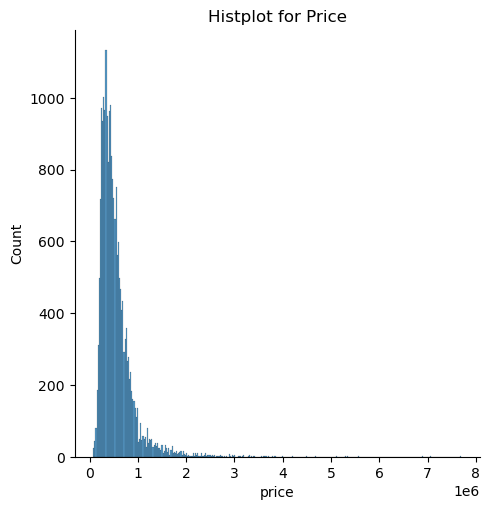

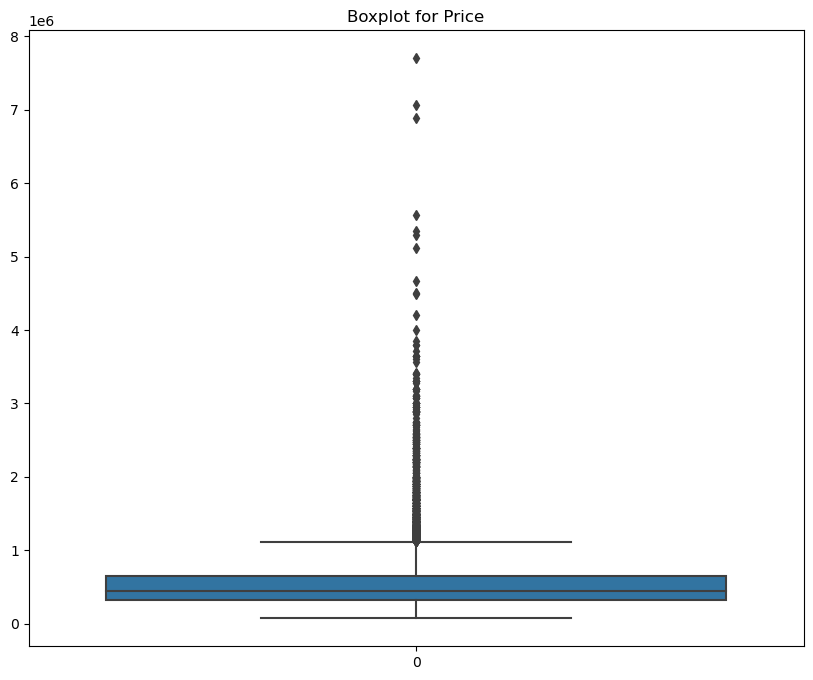

In [29]:
#EDA -
#Univariate analysis of price -
plotSizeX = 10
plotSizeY = 8
plt.figure(figsize=(plotSizeX, plotSizeY))
sns.displot(house_price['price']).set(title = "Histplot for Price")
plt.show();
plt.figure(figsize=(plotSizeX, plotSizeY))
sns.boxplot(data = house_price['price']).set(title = "Boxplot for Price")
plt.figure
plt.show();

<Figure size 1000x800 with 0 Axes>

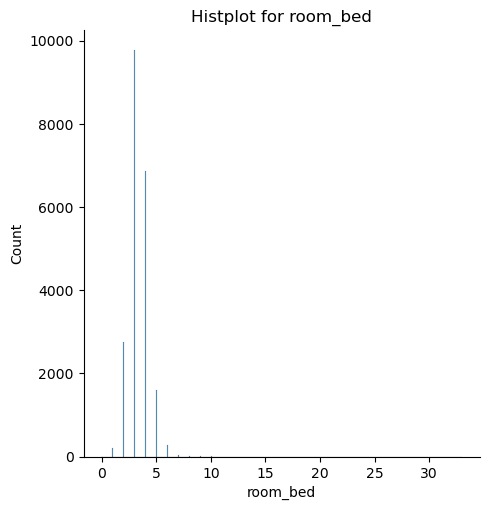

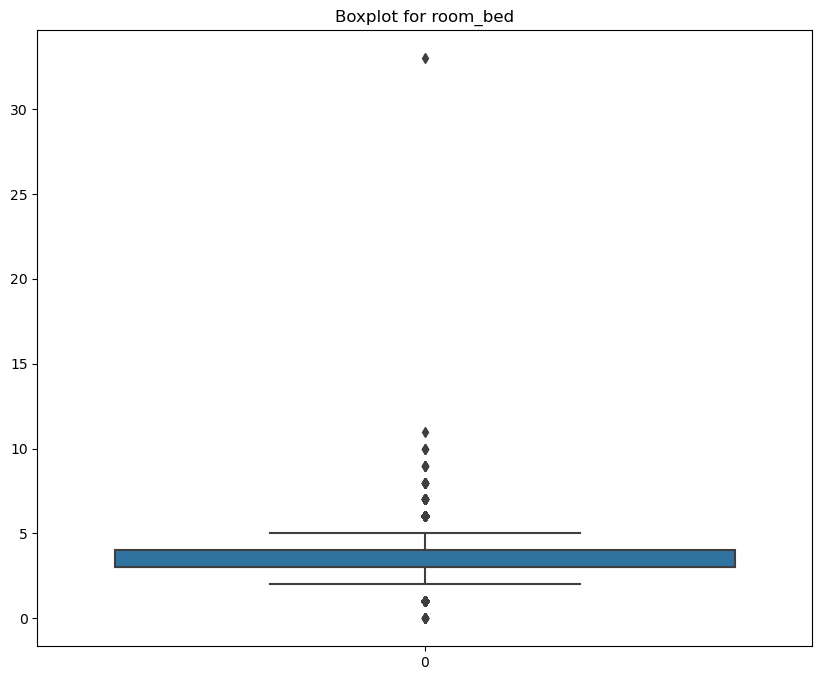

In [30]:
#Univariate analysis of room_bed -
plt.figure(figsize=(plotSizeX, plotSizeY))
sns.displot(house_price['room_bed']).set(title = "Histplot for room_bed")
plt.show();
plt.figure(figsize=(plotSizeX, plotSizeY))
sns.boxplot(data = house_price['room_bed']).set(title = "Boxplot for room_bed")
plt.figure
plt.show();

In [31]:
house_price.room_bed.value_counts().sort_index()

0.0       13
1.0      197
2.0     2747
3.0     9767
4.0     6854
5.0     1595
6.0      270
7.0       38
8.0       13
9.0        6
10.0       3
11.0       1
33.0       1
Name: room_bed, dtype: int64

In [32]:
house_price[house_price['room_bed']==33]

price  room_bed  room_bath  living_measure  lot_measure  ceil  coast  \
16913  640000      33.0       1.75          1620.0       6000.0   1.0    0.0   

       sight  condition  quality  ceil_measure  basement_measure  \
16913    0.0        5.0      7.0        1040.0             580.0   

       living_measure15  lot_measure15  furnished  total_area  renovated  \
16913            1330.0         4700.0        0.0      7620.0        0.0   

       basement  
16913       1.0

<Figure size 1000x800 with 0 Axes>

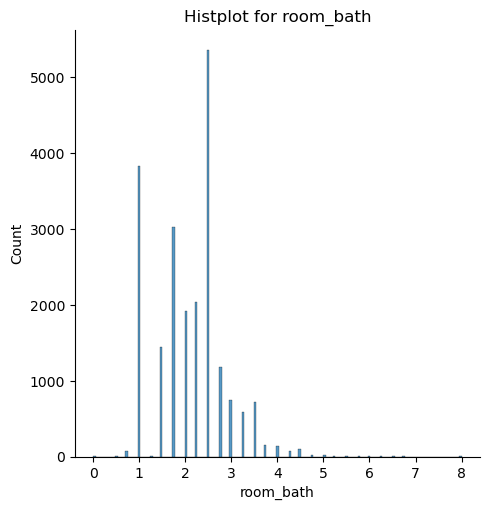

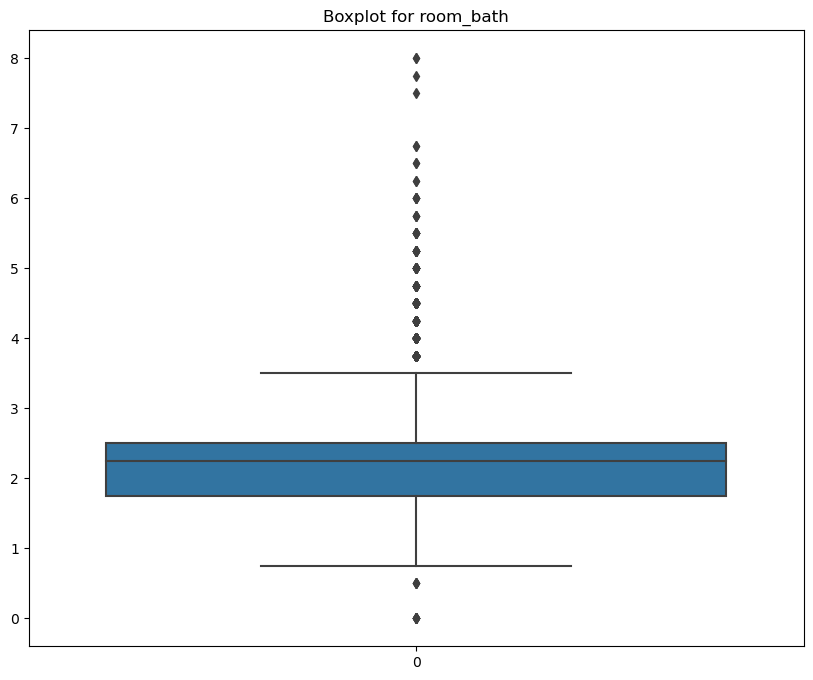

In [33]:
#Univariate analysis of room_bath -
plt.figure(figsize=(plotSizeX, plotSizeY))
sns.displot(house_price['room_bath']).set(title = "Histplot for room_bath")
plt.show();
plt.figure(figsize=(plotSizeX, plotSizeY))
sns.boxplot(data = house_price['room_bath']).set(title = "Boxplot for room_bath")
plt.figure
plt.show();

In [34]:
house_price.room_bath.value_counts().sort_index()

0.00      10
0.50       4
0.75      72
1.00    3829
1.25       9
1.50    1439
1.75    3031
2.00    1917
2.25    2039
2.50    5358
2.75    1178
3.00     750
3.25     588
3.50     726
3.75     155
4.00     135
4.25      78
4.50     100
4.75      23
5.00      21
5.25      13
5.50      10
5.75       4
6.00       6
6.25       2
6.50       2
6.75       2
7.50       1
7.75       1
8.00       2
Name: room_bath, dtype: int64

In [35]:
house_price[house_price['room_bath']>5.75]

price  room_bed  room_bath  living_measure  lot_measure  ceil  coast  \
1068   7700000       6.0       8.00         12050.0      27600.0   2.5    0.0   
1222    800000       7.0       6.75          7480.0      41664.0   2.0    0.0   
1245   4670000       5.0       6.75          9640.0      13068.0   1.0    1.0   
2828    900000       5.0       6.00          7120.0      40806.0   2.0    0.0   
4445   5300000       6.0       6.00          7390.0      24829.0   2.0    1.0   
5928    450000       9.0       7.50          4050.0       6504.0   2.0    0.0   
7928   2280000       7.0       8.00         13540.0     307752.0   3.0    0.0   
9132   1180000       6.0       6.50          6260.0      10955.0   2.0    0.0   
10639  6890000       6.0       7.75          9890.0      31374.0   2.0    0.0   
14364  2240000       5.0       6.50          7270.0     130017.0   2.0    0.0   
18840  4210000       5.0       6.00          7440.0      21540.0   2.0    0.0   
20193  2890000       5.0       6.25          8670.0      64033.0   2.0    0.0   
20691  3640000       5.0       6.00          5490.0      19897.0   2.0    0.0   
20746  3300000       5.0       6.25          8020.0      21738.0   2.0    0.0   
21133  2150000       8.0       6.00          4340.0       9415.0   2.0    0.0   
21201  1490000       5.0       6.00          6880.0     279968.0   2.0    0.0   

       sight  condition  quality  ceil_measure  basement_measure  \
1068     3.0        4.0     13.0        8570.0            3480.0   
1222     2.0        3.0     11.0        5080.0            2400.0   
1245     4.0        3.0     12.0        4820.0            4820.0   
2828     4.0        3.0     12.0        5480.0            1640.0   
4445     4.0        4.0     12.0        5000.0            2390.0   
5928     0.0        3.0      7.0        4050.0               0.0   
7928     4.0        3.0     12.0        9410.0            4130.0   
9132     0.0        3.0     11.0        4840.0            1420.0   
10639    4.0        3.0     13.0        8860.0            1030.0   
14364    0.0        3.0     12.0        6420.0             850.0   
18840    0.0        3.0     12.0        5550.0            1890.0   
20193    4.0        3.0     13.0        6120.0            2550.0   
20691    0.0        3.0     12.0        5490.0               0.0   
20746    0.0        3.0     11.0        8020.0               0.0   
21133    0.0        3.0      8.0        4340.0               0.0   
21201    3.0        3.0     12.0        4070.0            2810.0   

       living_measure15  lot_measure15  furnished  total_area  renovated  \
1068             3940.0         8800.0        1.0     39650.0        1.0   
1222             2810.0        33190.0        1.0     49144.0        0.0   
1245             3270.0        10454.0        1.0     22708.0        1.0   
2828             3440.0        36859.0        1.0     47926.0        0.0   
4445             4320.0        24619.0        1.0     32219.0        0.0   
5928             1448.0         3866.0        0.0     10554.0        0.0   
7928             4850.0       217800.0        1.0    321292.0        0.0   
9132             2710.0        12550.0        1.0     17215.0        0.0   
10639            4540.0        42730.0        1.0     41264.0        0.0   
14364            1800.0        44890.0        1.0    137287.0        0.0   
18840            4740.0        19329.0        1.0     28980.0        0.0   
20193            4140.0        81021.0        1.0     72703.0        1.0   
20691            2910.0        17600.0        1.0     25387.0        0.0   
20746            4160.0        18969.0        1.0     29758.0        0.0   
21133            2050.0         9100.0        0.0     13755.0        0.0   
21201            4690.0       256803.0        1.0    286848.0        0.0   

       basement  
1068        1.0  
1222        1.0  
1245        1.0  
2828        1.0  
4445        1.0  
5928        0.0  
7928        1.0  
9132        1.0  
10639       1.0  
1

In [36]:
house_price[house_price['room_bath']==0.0]

price  room_bed  room_bath  living_measure  lot_measure  ceil  coast  \
3155   1300000       0.0        0.0          4810.0      28008.0   2.0    0.0   
3405    142000       0.0        0.0           290.0      20875.0   1.0    0.0   
4238    235000       0.0        0.0          1470.0       4800.0   2.0    0.0   
4730    484000       1.0        0.0           690.0      23244.0   1.0    0.0   
15593   380000       0.0        0.0          1470.0        979.0   3.0    0.0   
17704   355000       0.0        0.0          2460.0       8049.0   2.0    0.0   
17946    75000       1.0        0.0           670.0      43377.0   1.0    0.0   
18596   139950       0.0        0.0           844.0       4269.0   1.0    0.0   
20355   280000       1.0        0.0           600.0      24501.0   1.0    0.0   
20957  1100000       0.0        0.0          3064.0       4764.0   3.5    0.0   

       sight  condition  quality  ceil_measure  basement_measure  \
3155     0.0        3.0     12.0        4810.0               0.0   
3405     0.0        1.0      1.0         290.0               0.0   
4238     0.0        3.0      7.0        1470.0               0.0   
4730     0.0        4.0      7.0         690.0               0.0   
15593    2.0        3.0      8.0        1470.0               0.0   
17704    0.0        3.0      8.0        2460.0               0.0   
17946    0.0        3.0      3.0         670.0               0.0   
18596    0.0        4.0      7.0         844.0               0.0   
20355    0.0        2.0      3.0         600.0               0.0   
20957    2.0        3.0      7.0        3064.0               0.0   

       living_measure15  lot_measure15  furnished  total_area  renovated  \
3155             4740.0        35061.0        1.0     32818.0        0.0   
3405             1620.0        22850.0        0.0     21165.0        0.0   
4238             1060.0         7200.0        0.0      6270.0        0.0   
4730             1690.0        19290.0        0.0     23934.0        0.0   
15593            1470.0         1399.0        0.0      2449.0        0.0   
17704            2520.0         8050.0        0.0     10509.0        0.0   
17946            1160.0        42882.0        0.0     44047.0        0.0   
18596            1380.0         9600.0        0.0      5113.0        0.0   
20355             990.0        22549.0        0.0     25101.0        0.0   
20957            2360.0         4000.0        0.0      7828.0        0.0   

       basement  
3155        0.0  
3405        0.0  
4238        0.0  
4730        0.0  
15593       0.0  
17704       0.0  
17946       0.0  
18596       0.0  
20355       0.0  
20957       0.0

<Figure size 1000x800 with 0 Axes>

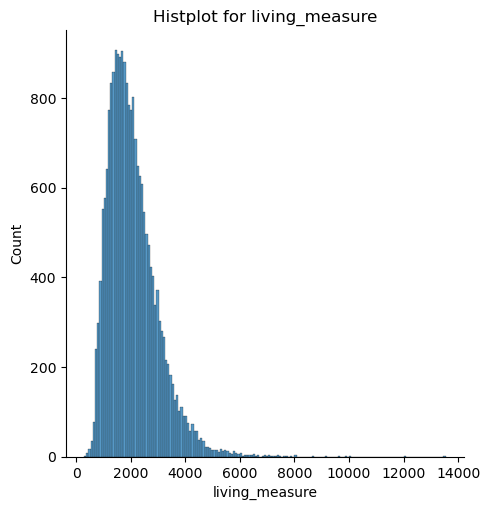

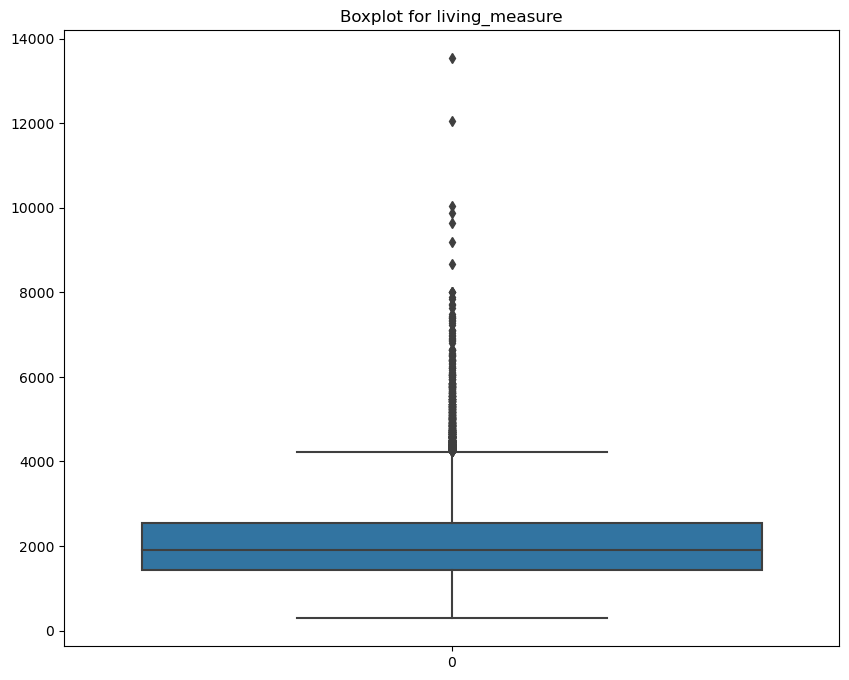

In [37]:
#Univariate analysis of living_measure -
plt.figure(figsize=(plotSizeX, plotSizeY))
sns.displot(house_price['living_measure']).set(title = "Histplot for living_measure")
plt.show();
plt.figure(figsize=(plotSizeX, plotSizeY))
sns.boxplot(data = house_price['living_measure']).set(title = "Boxplot for living_measure")
plt.figure
plt.show();

In [38]:
house_price[house_price['living_measure']>10000]

price  room_bed  room_bath  living_measure  lot_measure  ceil  coast  \
1068   7700000       6.0        8.0         12050.0      27600.0   2.5    0.0   
7928   2280000       7.0        8.0         13540.0     307752.0   3.0    0.0   
10718  7060000       5.0        4.5         10040.0      37325.0   2.0    1.0   

       sight  condition  quality  ceil_measure  basement_measure  \
1068     3.0        4.0     13.0        8570.0            3480.0   
7928     4.0        3.0     12.0        9410.0            4130.0   
10718    2.0        3.0     11.0        7680.0            2360.0   

       living_measure15  lot_measure15  furnished  total_area  renovated  \
1068             3940.0         8800.0        1.0     39650.0        1.0   
7928             4850.0       217800.0        1.0    321292.0        0.0   
10718            3930.0        25449.0        1.0     47365.0        1.0   

       basement  
1068        1.0  
7928        1.0  
10718       1.0

<Figure size 1000x800 with 0 Axes>

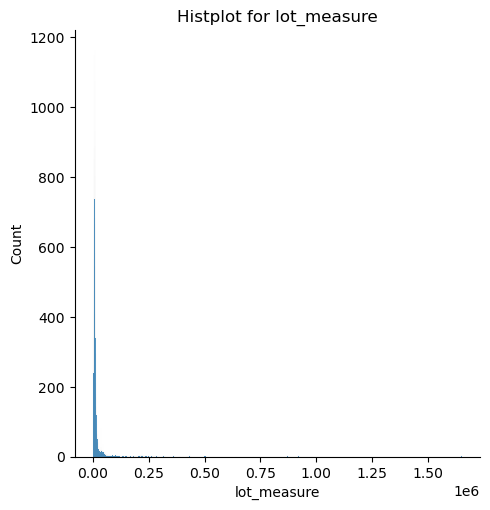

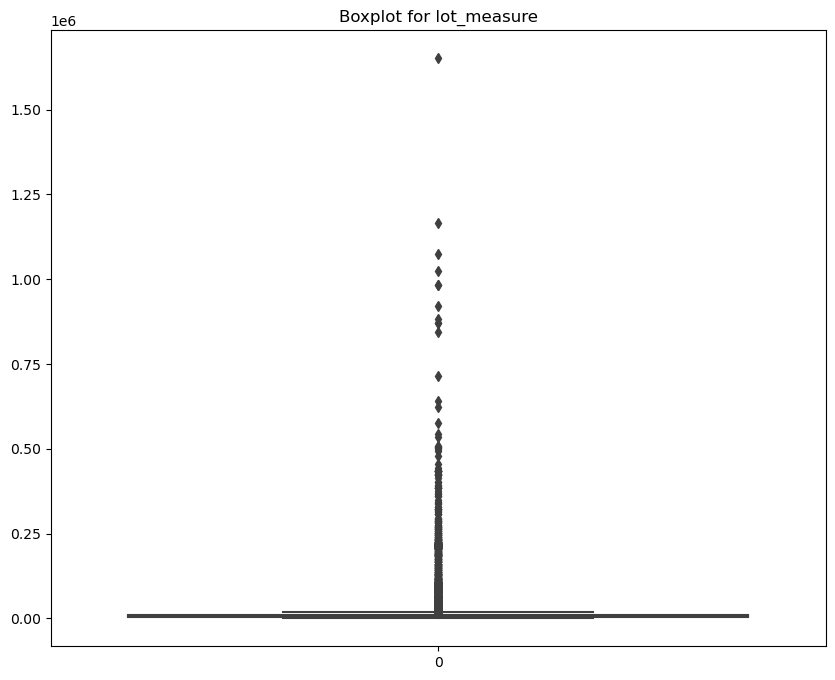

In [39]:
#Univariate analysis of lot_measure -
plt.figure(figsize=(plotSizeX, plotSizeY))
sns.displot(house_price['lot_measure']).set(title = "Histplot for lot_measure")
plt.show();
plt.figure(figsize=(plotSizeX, plotSizeY))
sns.boxplot(data = house_price['lot_measure']).set(title = "Boxplot for lot_measure")
plt.figure
plt.show();

In [40]:
house_price[house_price['lot_measure']>1000000]

price  room_bed  room_bath  living_measure  lot_measure  ceil  coast  \
580    190000       2.0       1.00           710.0    1164794.0   1.0    0.0   
3234   542500       5.0       3.25          3010.0    1074218.0   1.5    0.0   
11674  700000       4.0       1.00          1300.0    1651359.0   1.0    0.0   
21402  855000       4.0       3.50          4030.0    1024068.0   2.0    0.0   

       sight  condition  quality  ceil_measure  basement_measure  \
580      0.0        2.0      5.0         710.0               0.0   
3234     0.0        5.0      8.0        2010.0            1000.0   
11674    3.0        4.0      6.0        1300.0               0.0   
21402    0.0        3.0     10.0        4030.0               0.0   

       living_measure15  lot_measure15  furnished  total_area  renovated  \
580              1680.0        16730.0        0.0   1165504.0        0.0   
3234             2450.0        68825.0        0.0   1077228.0        0.0   
11674            2560.0       425581.0        0.0   1652659.0        0.0   
21402            1830.0        11700.0        1.0   1028098.0        0.0   

       basement  
580         0.0  
3234        1.0  
11674       0.0  
21402       0.0

<Figure size 1000x800 with 0 Axes>

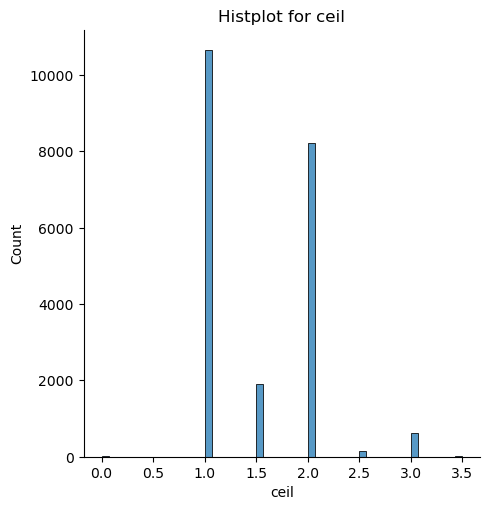

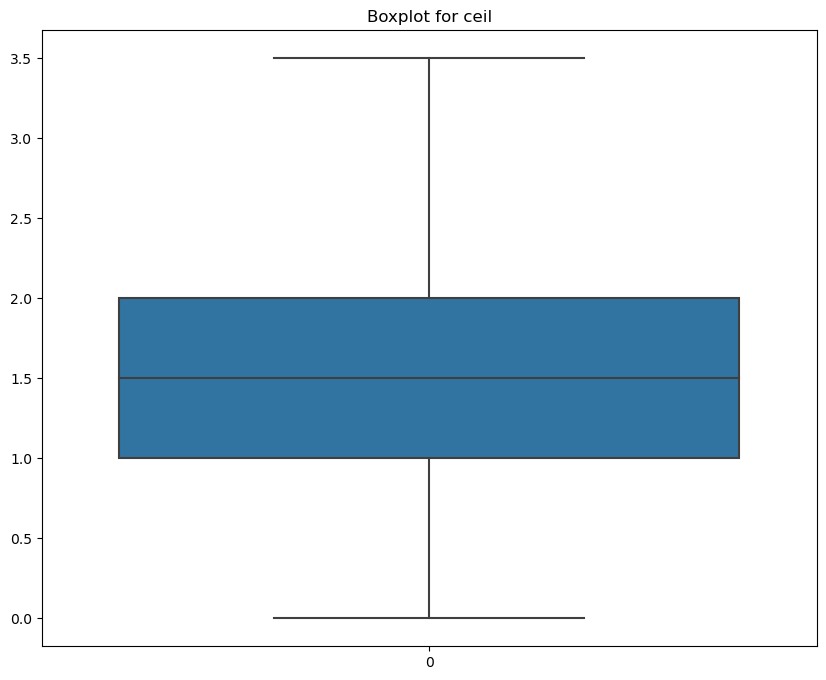

In [41]:
#Univariate analysis of ceil -
plt.figure(figsize=(plotSizeX, plotSizeY))
sns.displot(house_price['ceil']).set(title = "Histplot for ceil")
plt.show();
plt.figure(figsize=(plotSizeX, plotSizeY))
sns.boxplot(data = house_price['ceil']).set(title = "Boxplot for ceil")
plt.figure
plt.show();

In [42]:
house_price.ceil.value_counts().sort_index()

0.0       30
1.0    10647
1.5     1905
2.0     8210
2.5      161
3.0      610
3.5        8
Name: ceil, dtype: int64

<Figure size 1000x800 with 0 Axes>

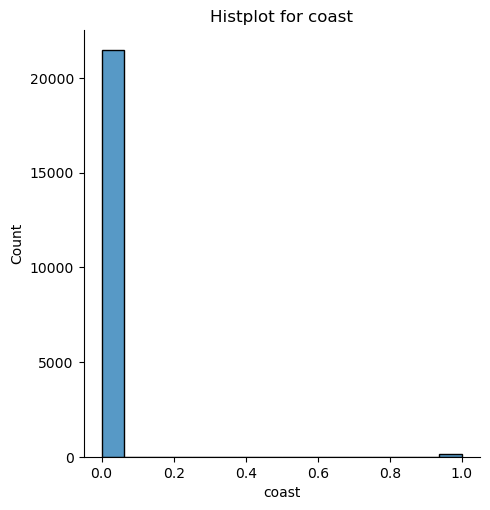

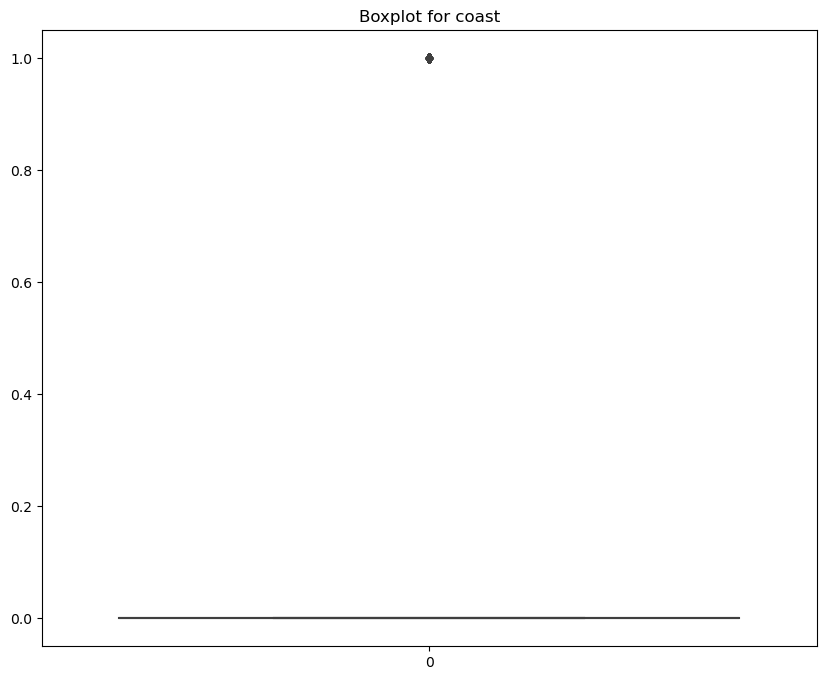

In [43]:
#Univariate analysis of coast -
plt.figure(figsize=(plotSizeX, plotSizeY))
sns.displot(house_price['coast']).set(title = "Histplot for coast")
plt.show();
plt.figure(figsize=(plotSizeX, plotSizeY))
sns.boxplot(data = house_price['coast']).set(title = "Boxplot for coast")
plt.figure
plt.show();

In [44]:
house_price.coast.value_counts()

0.0    21451
1.0      161
Name: coast, dtype: int64

<Figure size 1000x800 with 0 Axes>

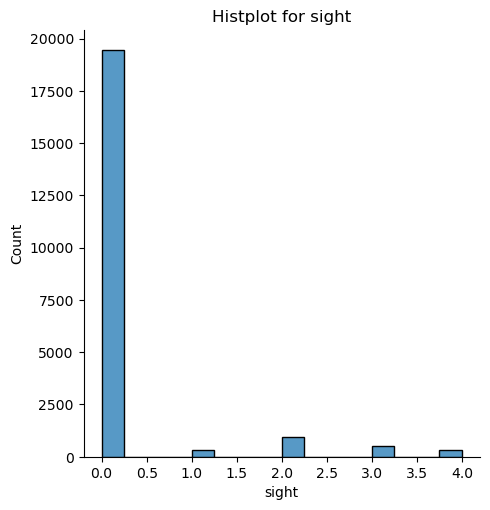

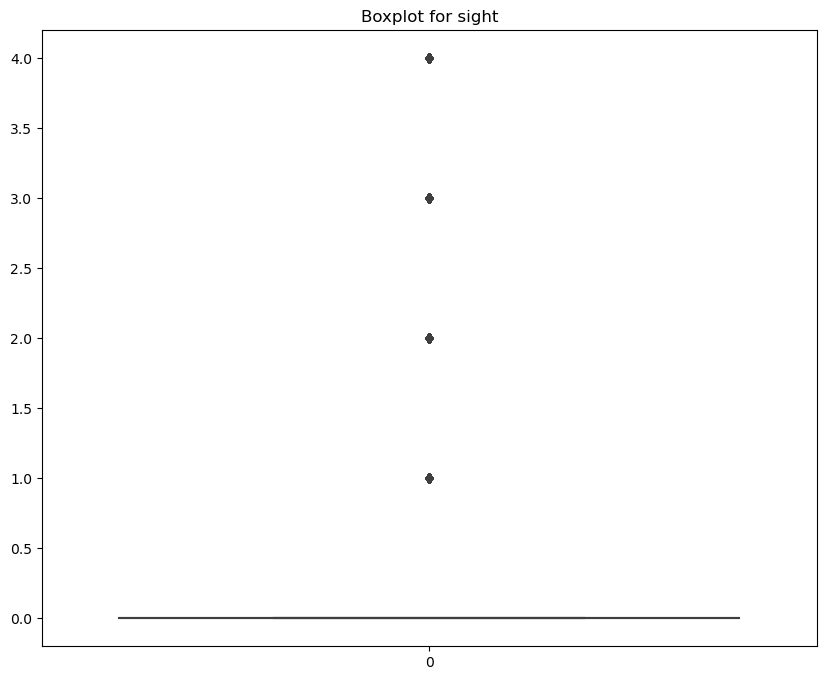

In [45]:
#Univariate analysis of sight -
plt.figure(figsize=(plotSizeX, plotSizeY))
sns.displot(house_price['sight']).set(title = "Histplot for sight")
plt.show();
plt.figure(figsize=(plotSizeX, plotSizeY))
sns.boxplot(data = house_price['sight']).set(title = "Boxplot for sight")
plt.figure
plt.show();

In [46]:
house_price.sight.value_counts()

0.0    19437
2.0      959
3.0      510
1.0      332
4.0      318
Name: sight, dtype: int64

<Figure size 1000x800 with 0 Axes>

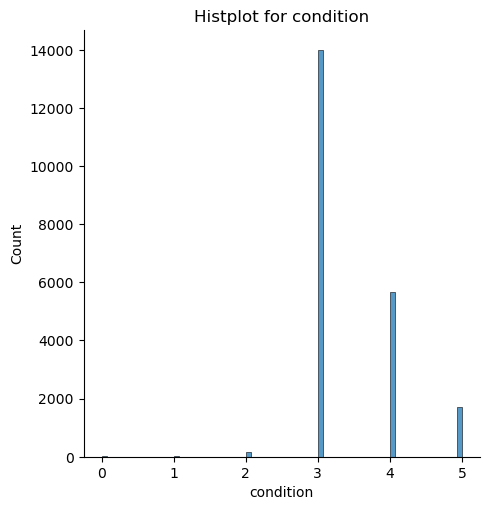

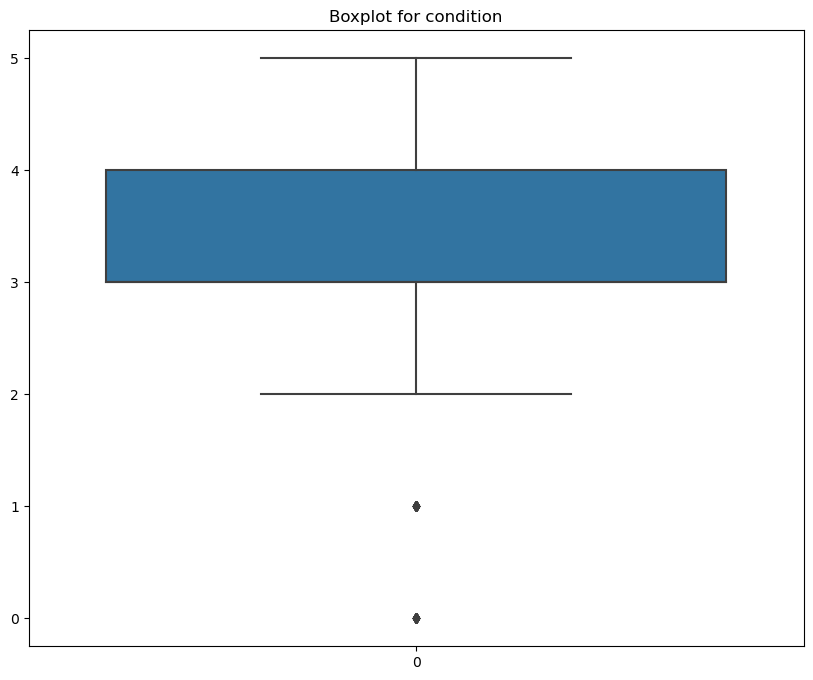

In [47]:
#Univariate analysis of condition -
plt.figure(figsize=(plotSizeX, plotSizeY))
sns.displot(house_price['condition']).set(title = "Histplot for condition")
plt.show();
plt.figure(figsize=(plotSizeX, plotSizeY))
sns.boxplot(data = house_price['condition']).set(title = "Boxplot for condition")
plt.figure
plt.show();

In [48]:
house_price.condition.value_counts().sort_index()

0.0       28
1.0       30
2.0      171
3.0    13978
4.0     5655
5.0     1694
Name: condition, dtype: int64

<Figure size 1000x800 with 0 Axes>

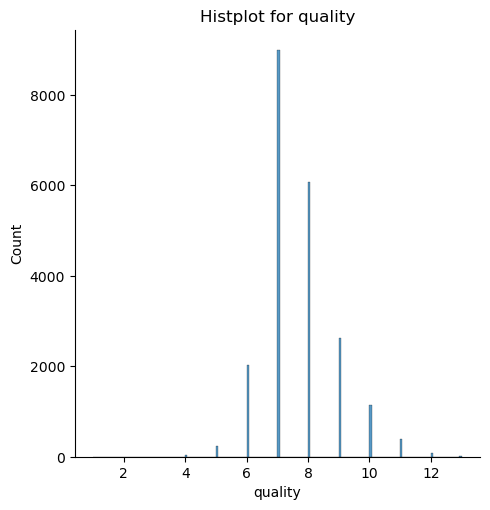

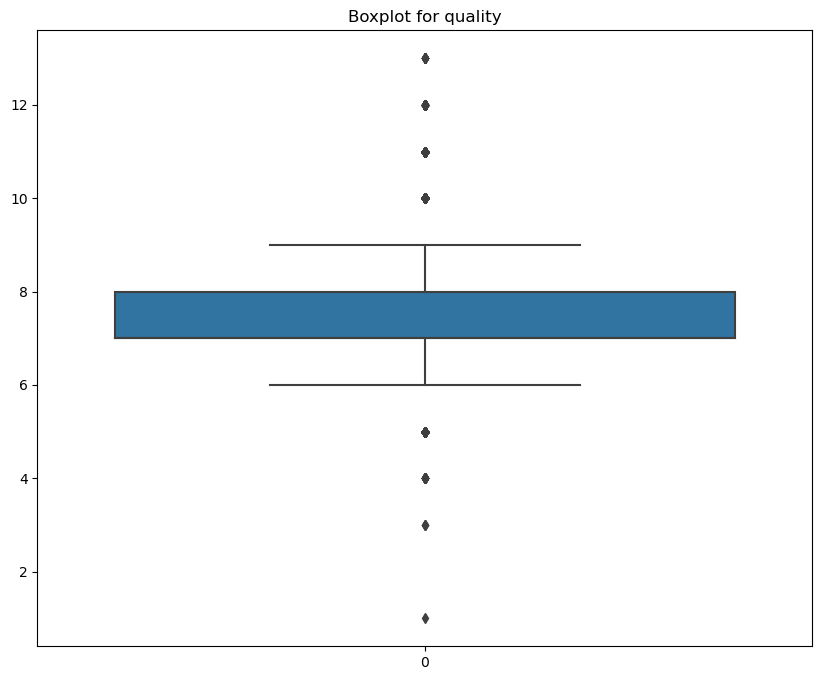

In [49]:
#Univariate analysis of quality -
plt.figure(figsize=(plotSizeX, plotSizeY))
sns.displot(house_price['quality']).set(title = "Histplot for quality")
plt.show();
plt.figure(figsize=(plotSizeX, plotSizeY))
sns.boxplot(data = house_price['quality']).set(title = "Boxplot for quality")
plt.figure
plt.show();

In [50]:
house_price.quality.value_counts().sort_index()

1.0        1
3.0        3
4.0       29
5.0      242
6.0     2038
7.0     8981
8.0     6067
9.0     2615
10.0    1134
11.0     399
12.0      90
13.0      13
Name: quality, dtype: int64

<Figure size 1000x800 with 0 Axes>

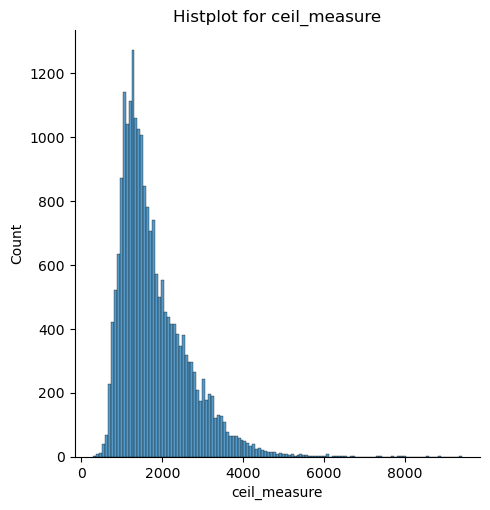

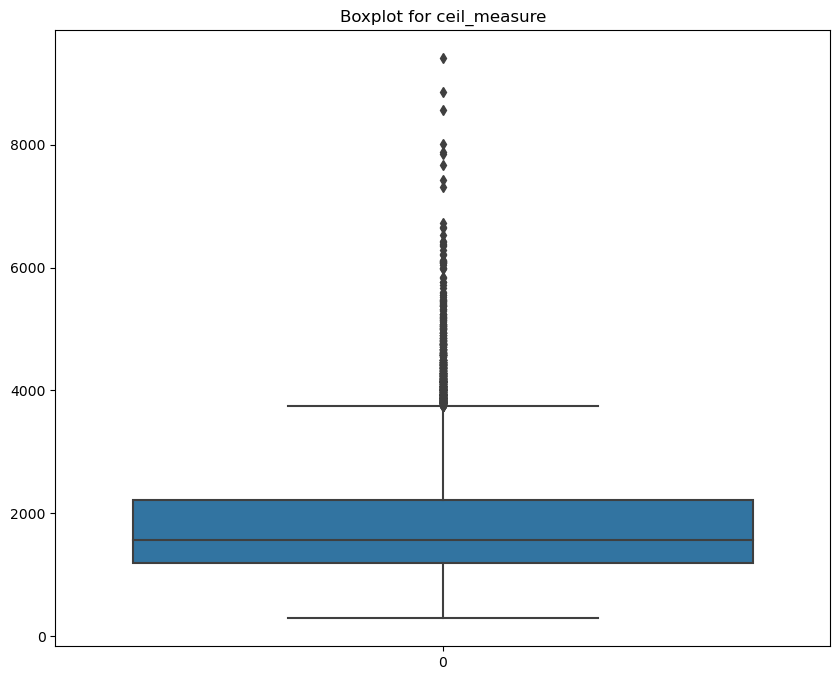

In [51]:
#Univariate analysis of ceil_measure -
plt.figure(figsize=(plotSizeX, plotSizeY))
sns.displot(house_price['ceil_measure']).set(title = "Histplot for ceil_measure")
plt.show();
plt.figure(figsize=(plotSizeX, plotSizeY))
sns.boxplot(data = house_price['ceil_measure']).set(title = "Boxplot for ceil_measure")
plt.figure
plt.show();

In [52]:
house_price[house_price['ceil_measure']>8000]

price  room_bed  room_bath  living_measure  lot_measure  ceil  coast  \
1068   7700000       6.0       8.00         12050.0      27600.0   2.5    0.0   
7928   2280000       7.0       8.00         13540.0     307752.0   3.0    0.0   
10639  6890000       6.0       7.75          9890.0      31374.0   2.0    0.0   
20746  3300000       5.0       6.25          8020.0      21738.0   2.0    0.0   

       sight  condition  quality  ceil_measure  basement_measure  \
1068     3.0        4.0     13.0        8570.0            3480.0   
7928     4.0        3.0     12.0        9410.0            4130.0   
10639    4.0        3.0     13.0        8860.0            1030.0   
20746    0.0        3.0     11.0        8020.0               0.0   

       living_measure15  lot_measure15  furnished  total_area  renovated  \
1068             3940.0         8800.0        1.0     39650.0        1.0   
7928             4850.0       217800.0        1.0    321292.0        0.0   
10639            4540.0        42730.0        1.0     41264.0        0.0   
20746            4160.0        18969.0        1.0     29758.0        0.0   

       basement  
1068        1.0  
7928        1.0  
10639       1.0  
20746       0.0

<Figure size 1000x800 with 0 Axes>

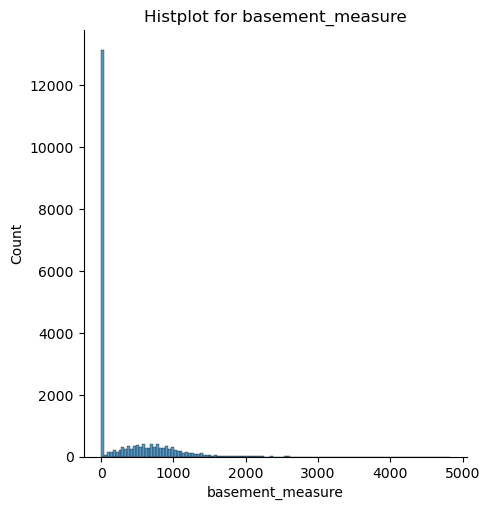

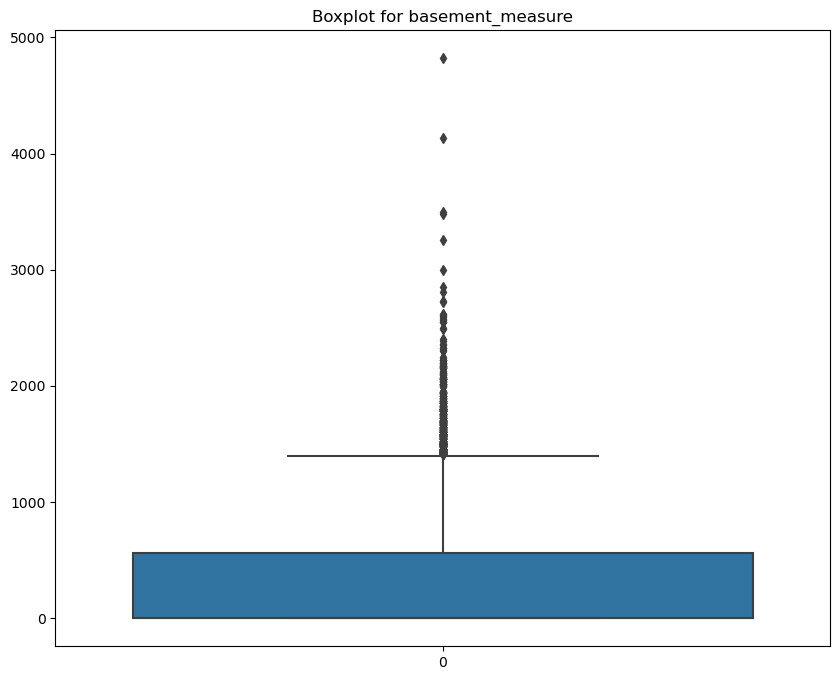

In [53]:
#Univariate analysis of basement_measure -
plt.figure(figsize=(plotSizeX, plotSizeY))
sns.displot(house_price['basement_measure']).set(title = "Histplot for basement_measure")
plt.show();
plt.figure(figsize=(plotSizeX, plotSizeY))
sns.boxplot(data = house_price['basement_measure']).set(title = "Boxplot for basement_measure")
plt.figure
plt.show();

In [54]:
house_price[house_price['basement_measure']>3000]

price  room_bed  room_bath  living_measure  lot_measure  ceil  coast  \
1017  3200000       4.0       3.25          7000.0      28206.0   1.0    1.0   
1068  7700000       6.0       8.00         12050.0      27600.0   2.5    0.0   
1245  4670000       5.0       6.75          9640.0      13068.0   1.0    1.0   
2668  1900000       5.0       4.25          6510.0      16471.0   2.0    0.0   
7928  2280000       7.0       8.00         13540.0     307752.0   3.0    0.0   

      sight  condition  quality  ceil_measure  basement_measure  \
1017    4.0        4.0     12.0        3500.0            3500.0   
1068    3.0        4.0     13.0        8570.0            3480.0   
1245    4.0        3.0     12.0        4820.0            4820.0   
2668    3.0        4.0     11.0        3250.0            3260.0   
7928    4.0        3.0     12.0        9410.0            4130.0   

      living_measure15  lot_measure15  furnished  total_area  renovated  \
1017            4913.0        14663.0        1.0     35206.0        0.0   
1068            3940.0         8800.0        1.0     39650.0        1.0   
1245            3270.0        10454.0        1.0     22708.0        1.0   
2668            4480.0        16471.0        1.0     22981.0        0.0   
7928            4850.0       217800.0        1.0    321292.0        0.0   

      basement  
1017       1.0  
1068       1.0  
1245       1.0  
2668       1.0  
7928       1.0

<Figure size 1000x800 with 0 Axes>

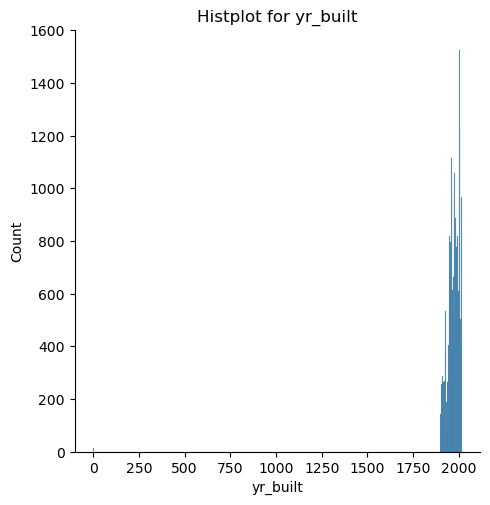

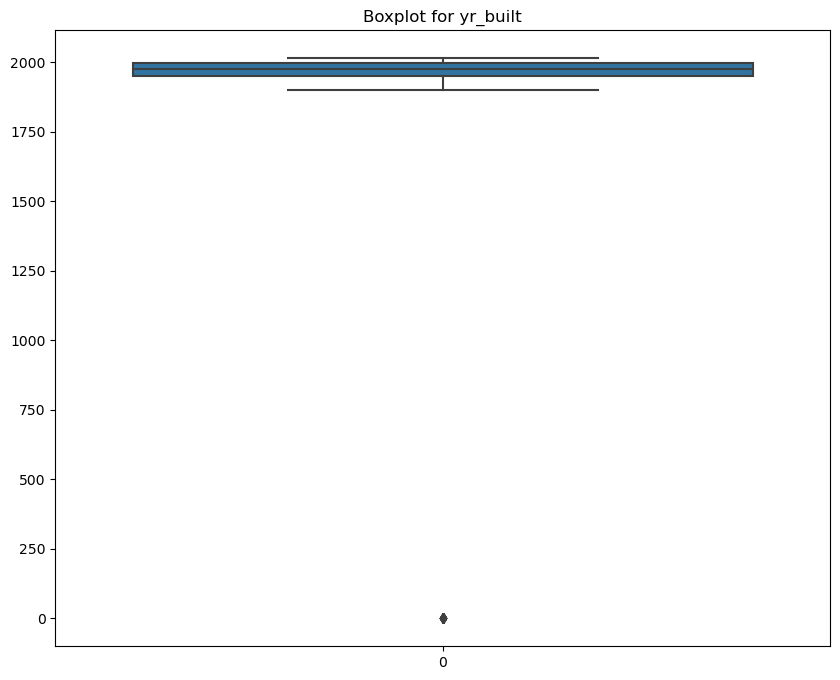

In [55]:
#Univariate analysis of yr_built -
plt.figure(figsize=(plotSizeX, plotSizeY))
sns.displot(house_price_1['yr_built']).set(title = "Histplot for yr_built")
plt.show();
plt.figure(figsize=(plotSizeX, plotSizeY))
sns.boxplot(data = house_price_1['yr_built']).set(title = "Boxplot for yr_built")
plt.figure
plt.show();

In [56]:
house_price_1.yr_built.value_counts().sort_index()

0.0        14
1900.0     87
1901.0     29
1902.0     27
1903.0     46
         ... 
2011.0    130
2012.0    170
2013.0    201
2014.0    559
2015.0     37
Name: yr_built, Length: 117, dtype: int64

<Figure size 1000x800 with 0 Axes>

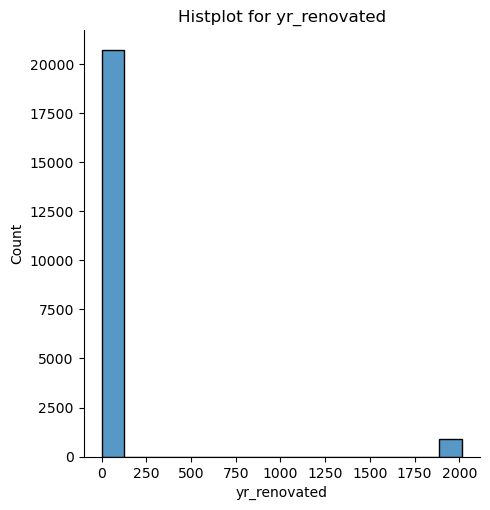

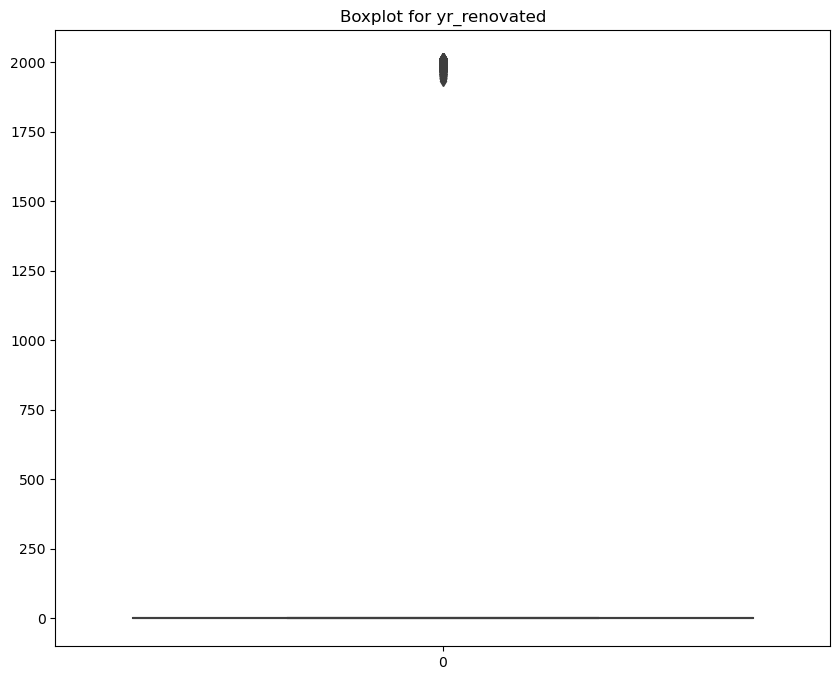

In [57]:
#Univariate analysis of yr_renovated -
plt.figure(figsize=(plotSizeX, plotSizeY))
sns.displot(house_price_1['yr_renovated']).set(title = "Histplot for yr_renovated")
plt.show();
plt.figure(figsize=(plotSizeX, plotSizeY))
sns.boxplot(data = house_price_1['yr_renovated']).set(title = "Boxplot for yr_renovated")
plt.figure
plt.show();

In [58]:
house_price_1.yr_renovated.value_counts().sort_index()

0       20699
1934        1
1940        2
1944        1
1945        3
        ...  
2011       13
2012       11
2013       37
2014       91
2015       16
Name: yr_renovated, Length: 70, dtype: int64

In [59]:
house_price.renovated.value_counts()

0.0    20699
1.0      914
Name: renovated, dtype: int64

<Figure size 1000x800 with 0 Axes>

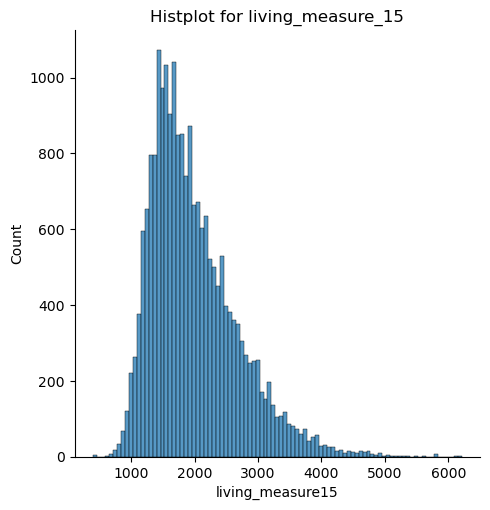

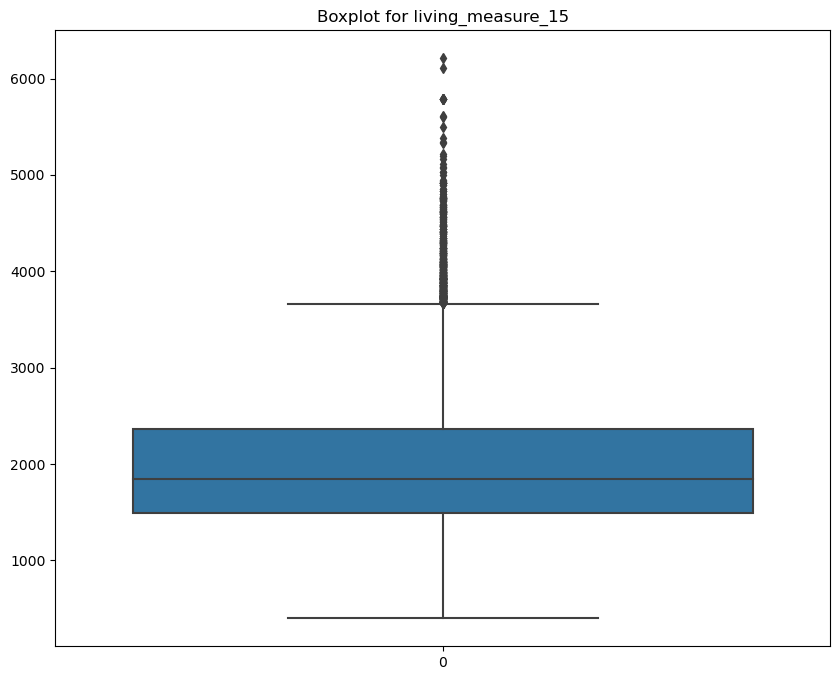

In [60]:
#Univariate analysis of living_measure_15 -
plt.figure(figsize=(plotSizeX, plotSizeY))
sns.displot(house_price['living_measure15']).set(title = "Histplot for living_measure_15")
plt.show();
plt.figure(figsize=(plotSizeX, plotSizeY))
sns.boxplot(data = house_price['living_measure15']).set(title = "Boxplot for living_measure_15")
plt.figure
plt.show();

In [61]:
house_price[house_price['living_measure15']>6000]

price  room_bed  room_bath  living_measure  lot_measure  ceil  coast  \
7829   2700000       4.0        4.0          7850.0      89651.0   2.0    0.0   
20547  2980000       5.0        5.5          7400.0      18898.0   2.0    0.0   

       sight  condition  quality  ceil_measure  basement_measure  \
7829     0.0        3.0     12.0        7850.0               0.0   
20547    3.0        3.0     13.0        6290.0            1110.0   

       living_measure15  lot_measure15  furnished  total_area  renovated  \
7829             6210.0        95832.0        1.0     97501.0        0.0   
20547            6110.0        26442.0        1.0     26298.0        0.0   

       basement  
7829        0.0  
20547       1.0

<Figure size 1000x800 with 0 Axes>

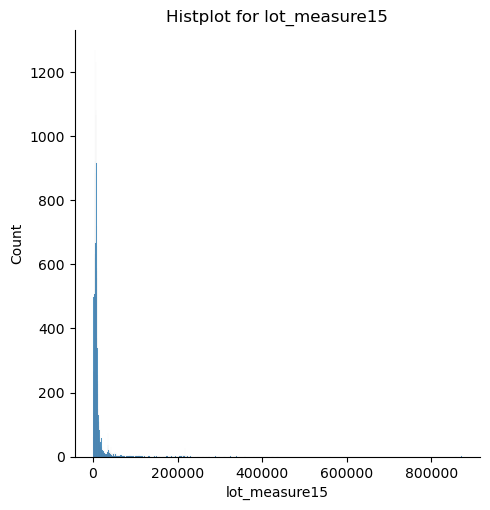

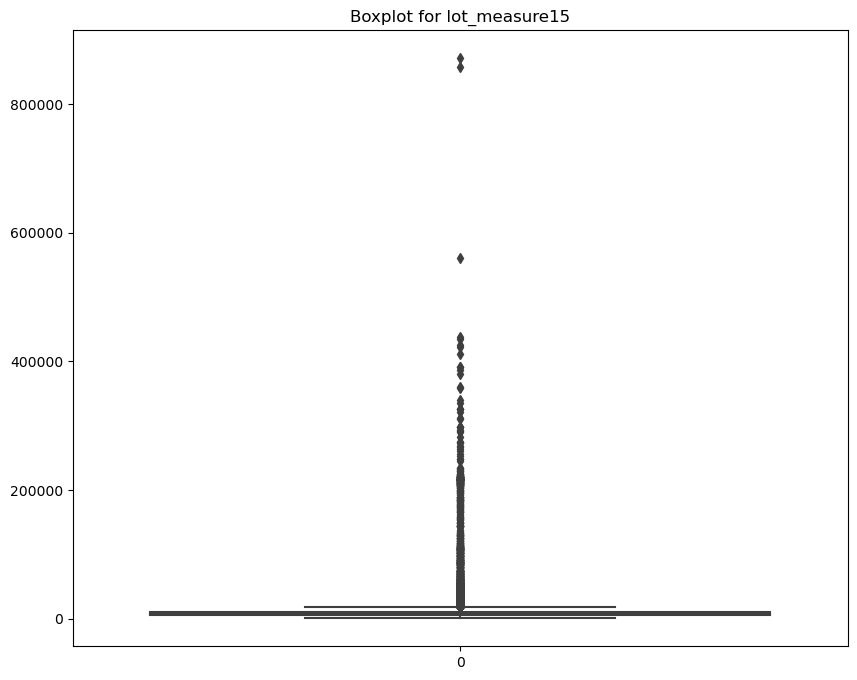

In [62]:
#Univariate analysis of lot_measure15 -
plt.figure(figsize=(plotSizeX, plotSizeY))
sns.displot(house_price['lot_measure15']).set(title = "Histplot for lot_measure15")
plt.show();
plt.figure(figsize=(plotSizeX, plotSizeY))
sns.boxplot(data = house_price['lot_measure15']).set(title = "Boxplot for lot_measure15")
plt.figure
plt.show();

In [63]:
house_price[house_price['lot_measure15']>500000]

price  room_bed  room_bath  living_measure  lot_measure  ceil  coast  \
2633    937500       4.0        4.0          5545.0     871200.0   2.0    0.0   
8221    790000       3.0        2.5          2640.0     432036.0   1.5    0.0   
19419  1600000       4.0        5.5          6530.0     871200.0   2.0    0.0   

       sight  condition  quality  ceil_measure  basement_measure  \
2633     0.0        3.0     11.0        3605.0            1940.0   
8221     3.0        3.0     10.0        2640.0               0.0   
19419    2.0        3.0     11.0        6530.0               0.0   

       living_measure15  lot_measure15  furnished  total_area  renovated  \
2633             3420.0       871200.0        1.0    876745.0        0.0   
8221             1500.0       560617.0        1.0    434676.0        0.0   
19419            1280.0       858132.0        1.0    877730.0        0.0   

       basement  
2633        1.0  
8221        0.0  
19419       0.0

<Figure size 1000x800 with 0 Axes>

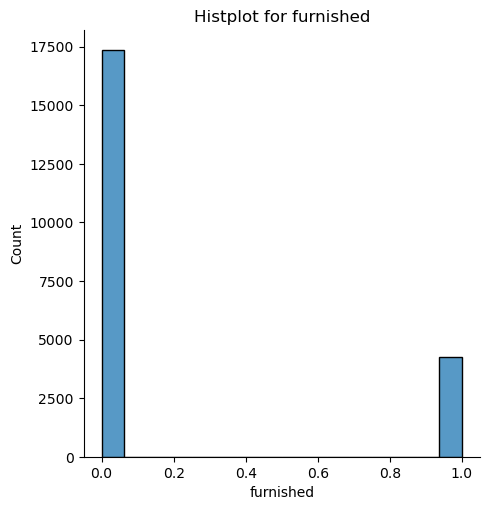

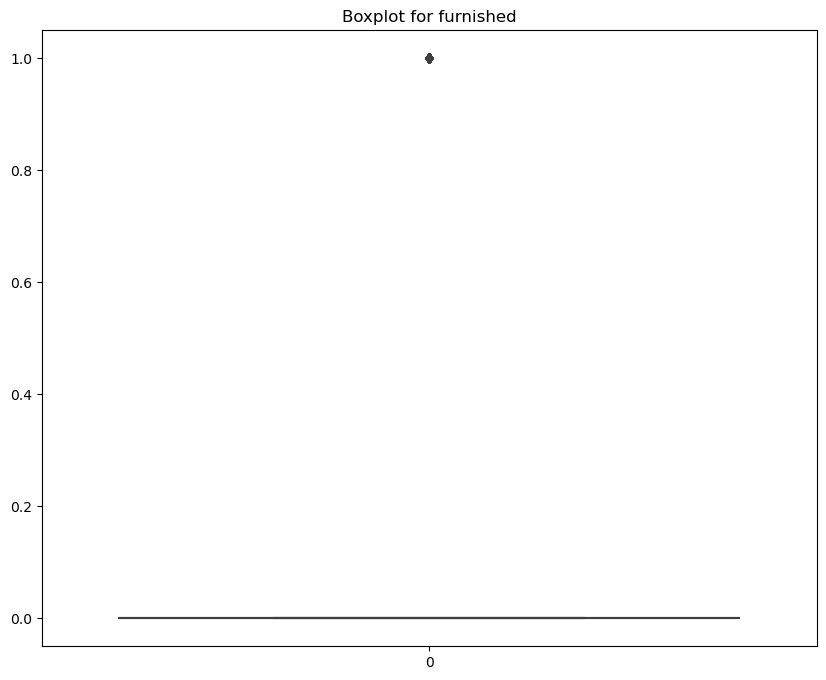

In [64]:
#Univariate analysis of furnished -
plt.figure(figsize=(plotSizeX, plotSizeY))
sns.displot(house_price['furnished']).set(title = "Histplot for furnished")
plt.show();
plt.figure(figsize=(plotSizeX, plotSizeY))
sns.boxplot(data = house_price['furnished']).set(title = "Boxplot for furnished")
plt.figure
plt.show();

In [65]:
house_price.furnished.value_counts()

0.0    17338
1.0     4246
Name: furnished, dtype: int64

<Figure size 1000x800 with 0 Axes>

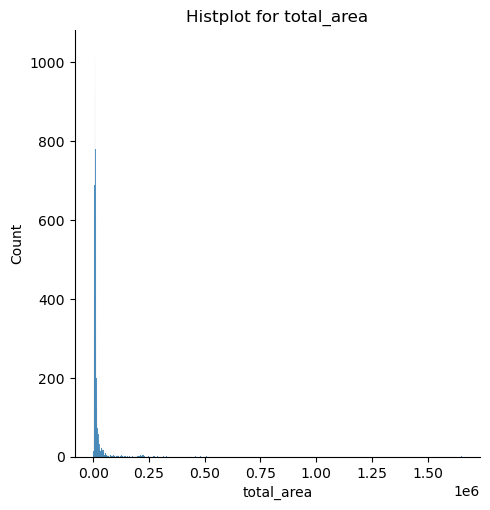

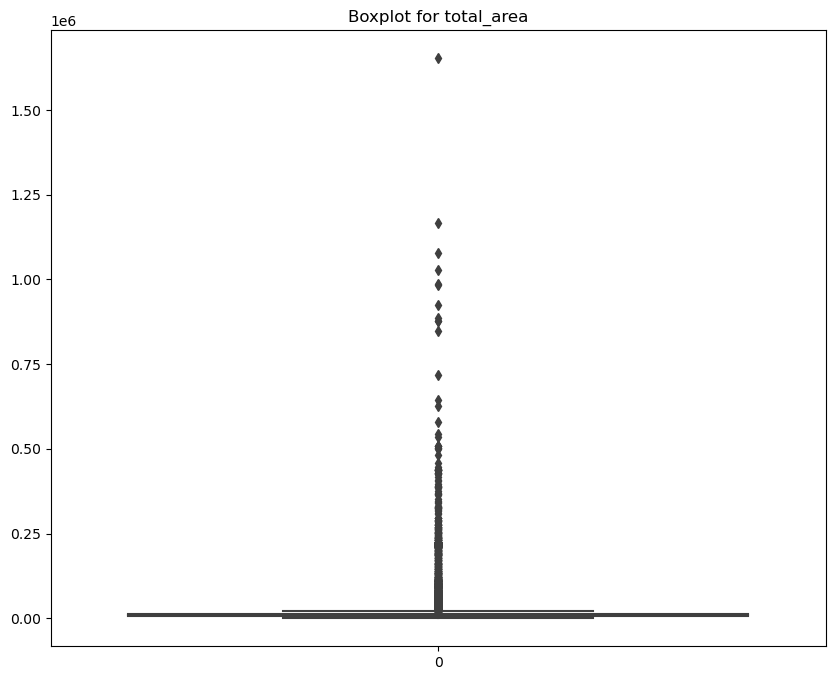

In [66]:
#Univariate analysis of total_area -
plt.figure(figsize=(plotSizeX, plotSizeY))
sns.displot(house_price['total_area']).set(title = "Histplot for total_area")
plt.show();
plt.figure(figsize=(plotSizeX, plotSizeY))
sns.boxplot(data = house_price['total_area']).set(title = "Boxplot for total_area")
plt.figure
plt.show();

In [67]:
house_price[house_price['total_area']>1000000]

price  room_bed  room_bath  living_measure  lot_measure  ceil  coast  \
580    190000       2.0       1.00           710.0    1164794.0   1.0    0.0   
3234   542500       5.0       3.25          3010.0    1074218.0   1.5    0.0   
11674  700000       4.0       1.00          1300.0    1651359.0   1.0    0.0   
21402  855000       4.0       3.50          4030.0    1024068.0   2.0    0.0   

       sight  condition  quality  ceil_measure  basement_measure  \
580      0.0        2.0      5.0         710.0               0.0   
3234     0.0        5.0      8.0        2010.0            1000.0   
11674    3.0        4.0      6.0        1300.0               0.0   
21402    0.0        3.0     10.0        4030.0               0.0   

       living_measure15  lot_measure15  furnished  total_area  renovated  \
580              1680.0        16730.0        0.0   1165504.0        0.0   
3234             2450.0        68825.0        0.0   1077228.0        0.0   
11674            2560.0       425581.0        0.0   1652659.0        0.0   
21402            1830.0        11700.0        1.0   1028098.0        0.0   

       basement  
580         0.0  
3234        1.0  
11674       0.0  
21402       0.0

In [68]:
house_price[house_price['total_area']==0]

price  room_bed  room_bath  living_measure  lot_measure  ceil  coast  \
128     532000       3.0       2.50          1830.0       8022.0   2.0    0.0   
402     910000       3.0       2.00          2700.0       6120.0   1.0    0.0   
578     750000       4.0       2.25          2160.0       9525.0   1.0    0.0   
1020    430000       3.0       1.00           940.0      12521.0   1.5    0.0   
1159    875000       3.0       2.75          3270.0      39586.0   1.5    0.0   
1192    265000       3.0       2.50          1780.0       6527.0   2.0    0.0   
2211    720000       4.0       2.50          3420.0      17038.0   2.0    0.0   
2278    465000       4.0       2.50          2820.0      39413.0   2.0    0.0   
3308    279200       1.0       1.00           640.0       6350.0   1.0    0.0   
3475    776500       4.0       1.50          2290.0      10372.0   1.0    0.0   
4651    799000       3.0       1.00          1510.0       4178.0   2.0    0.0   
4706    300000       3.0       2.25          2070.0       7225.0   1.0    0.0   
5696    294350       3.0       1.00          1410.0       5120.0   1.5    0.0   
8013    369990       4.0       2.50          1960.0       7133.0   2.0    0.0   
9202    329990       4.0       2.75          2420.0       8438.0   2.0    0.0   
9613    420000       5.0       3.00          2630.0       3149.0   2.0    0.0   
10516   340000       3.0       2.00          1130.0       9879.0   2.0    0.0   
10613   189950       3.0       1.00           920.0       6460.0   1.0    0.0   
10663   550000       3.0       2.25          1950.0      26500.0   1.0    0.0   
11277   808000       8.0       3.75          3460.0       4600.0   2.0    0.0   
11292   579000       2.0       2.00          1870.0       6275.0   1.0    0.0   
11491  1600000       4.0       2.50          2980.0      13341.0   1.5    1.0   
11539   213500       3.0       1.00          1220.0       6000.0   1.0    0.0   
12355   528000       3.0       2.50          2020.0       5613.0   2.0    0.0   
13744   288000       3.0       1.00          1410.0      40500.0   1.0    0.0   
14571   463000       2.0       1.00          1250.0       5650.0   2.0    0.0   
14889  1210000       3.0       2.25          1590.0       8520.0   2.0    0.0   
16546   305000       3.0       2.00          1430.0      12430.0   1.0    0.0   
16653   335000       3.0       2.50          2440.0       7632.0   2.0    0.0   
16988   795000       4.0       2.50          3160.0      16564.0   2.0    0.0   
17072   415000       3.0       1.00          1300.0       7975.0   1.0    0.0   
17569   262000       3.0       2.50          1680.0      10300.0   2.0    0.0   
17737   720000       3.0       2.50          2100.0       2200.0   2.0    0.0   
17738   998160       2.0       2.50          3010.0      16050.0   1.0    0.0   
18296   491950       3.0       2.25          2090.0      10733.0   1.0    0.0   
19480   263000       3.0       1.75          1790.0       7485.0   1.0    0.0   
19981   425000       2.0       1.00          1250.0       5880.0   1.0    0.0   
20199   411000       5.0       1.75          2860.0      12293.0   1.0    0.0   
20251   379000       3.0       1.00          1140.0      10320.0   1.0    0.0   

       sight  condition  quality  ceil_measure  basement_measure  \
128      0.0        3.0      8.0        1830.0               0.0   
402      0.0        4.0      8.0        1350.0            1350.0   
578      0.0        3.0      8.0        1080.0            1080.0   
1020     0.0        4.0      7.0         940.0               0.0   
1159     0.0        3.0     11.0        3270.0               0.0   
1192     0.0        3.0      8.0        1780.0               0.0   
2211     0.0        3.0      9.0        3420.0               0.0   
2278     0.0        4.0      9.0        2820.0               0.0   
3308     0.0        3.0      5.0         640.0               0.0   
3475     0.0        3.0      7.0        1510.0             780.0   
4651     0.0        

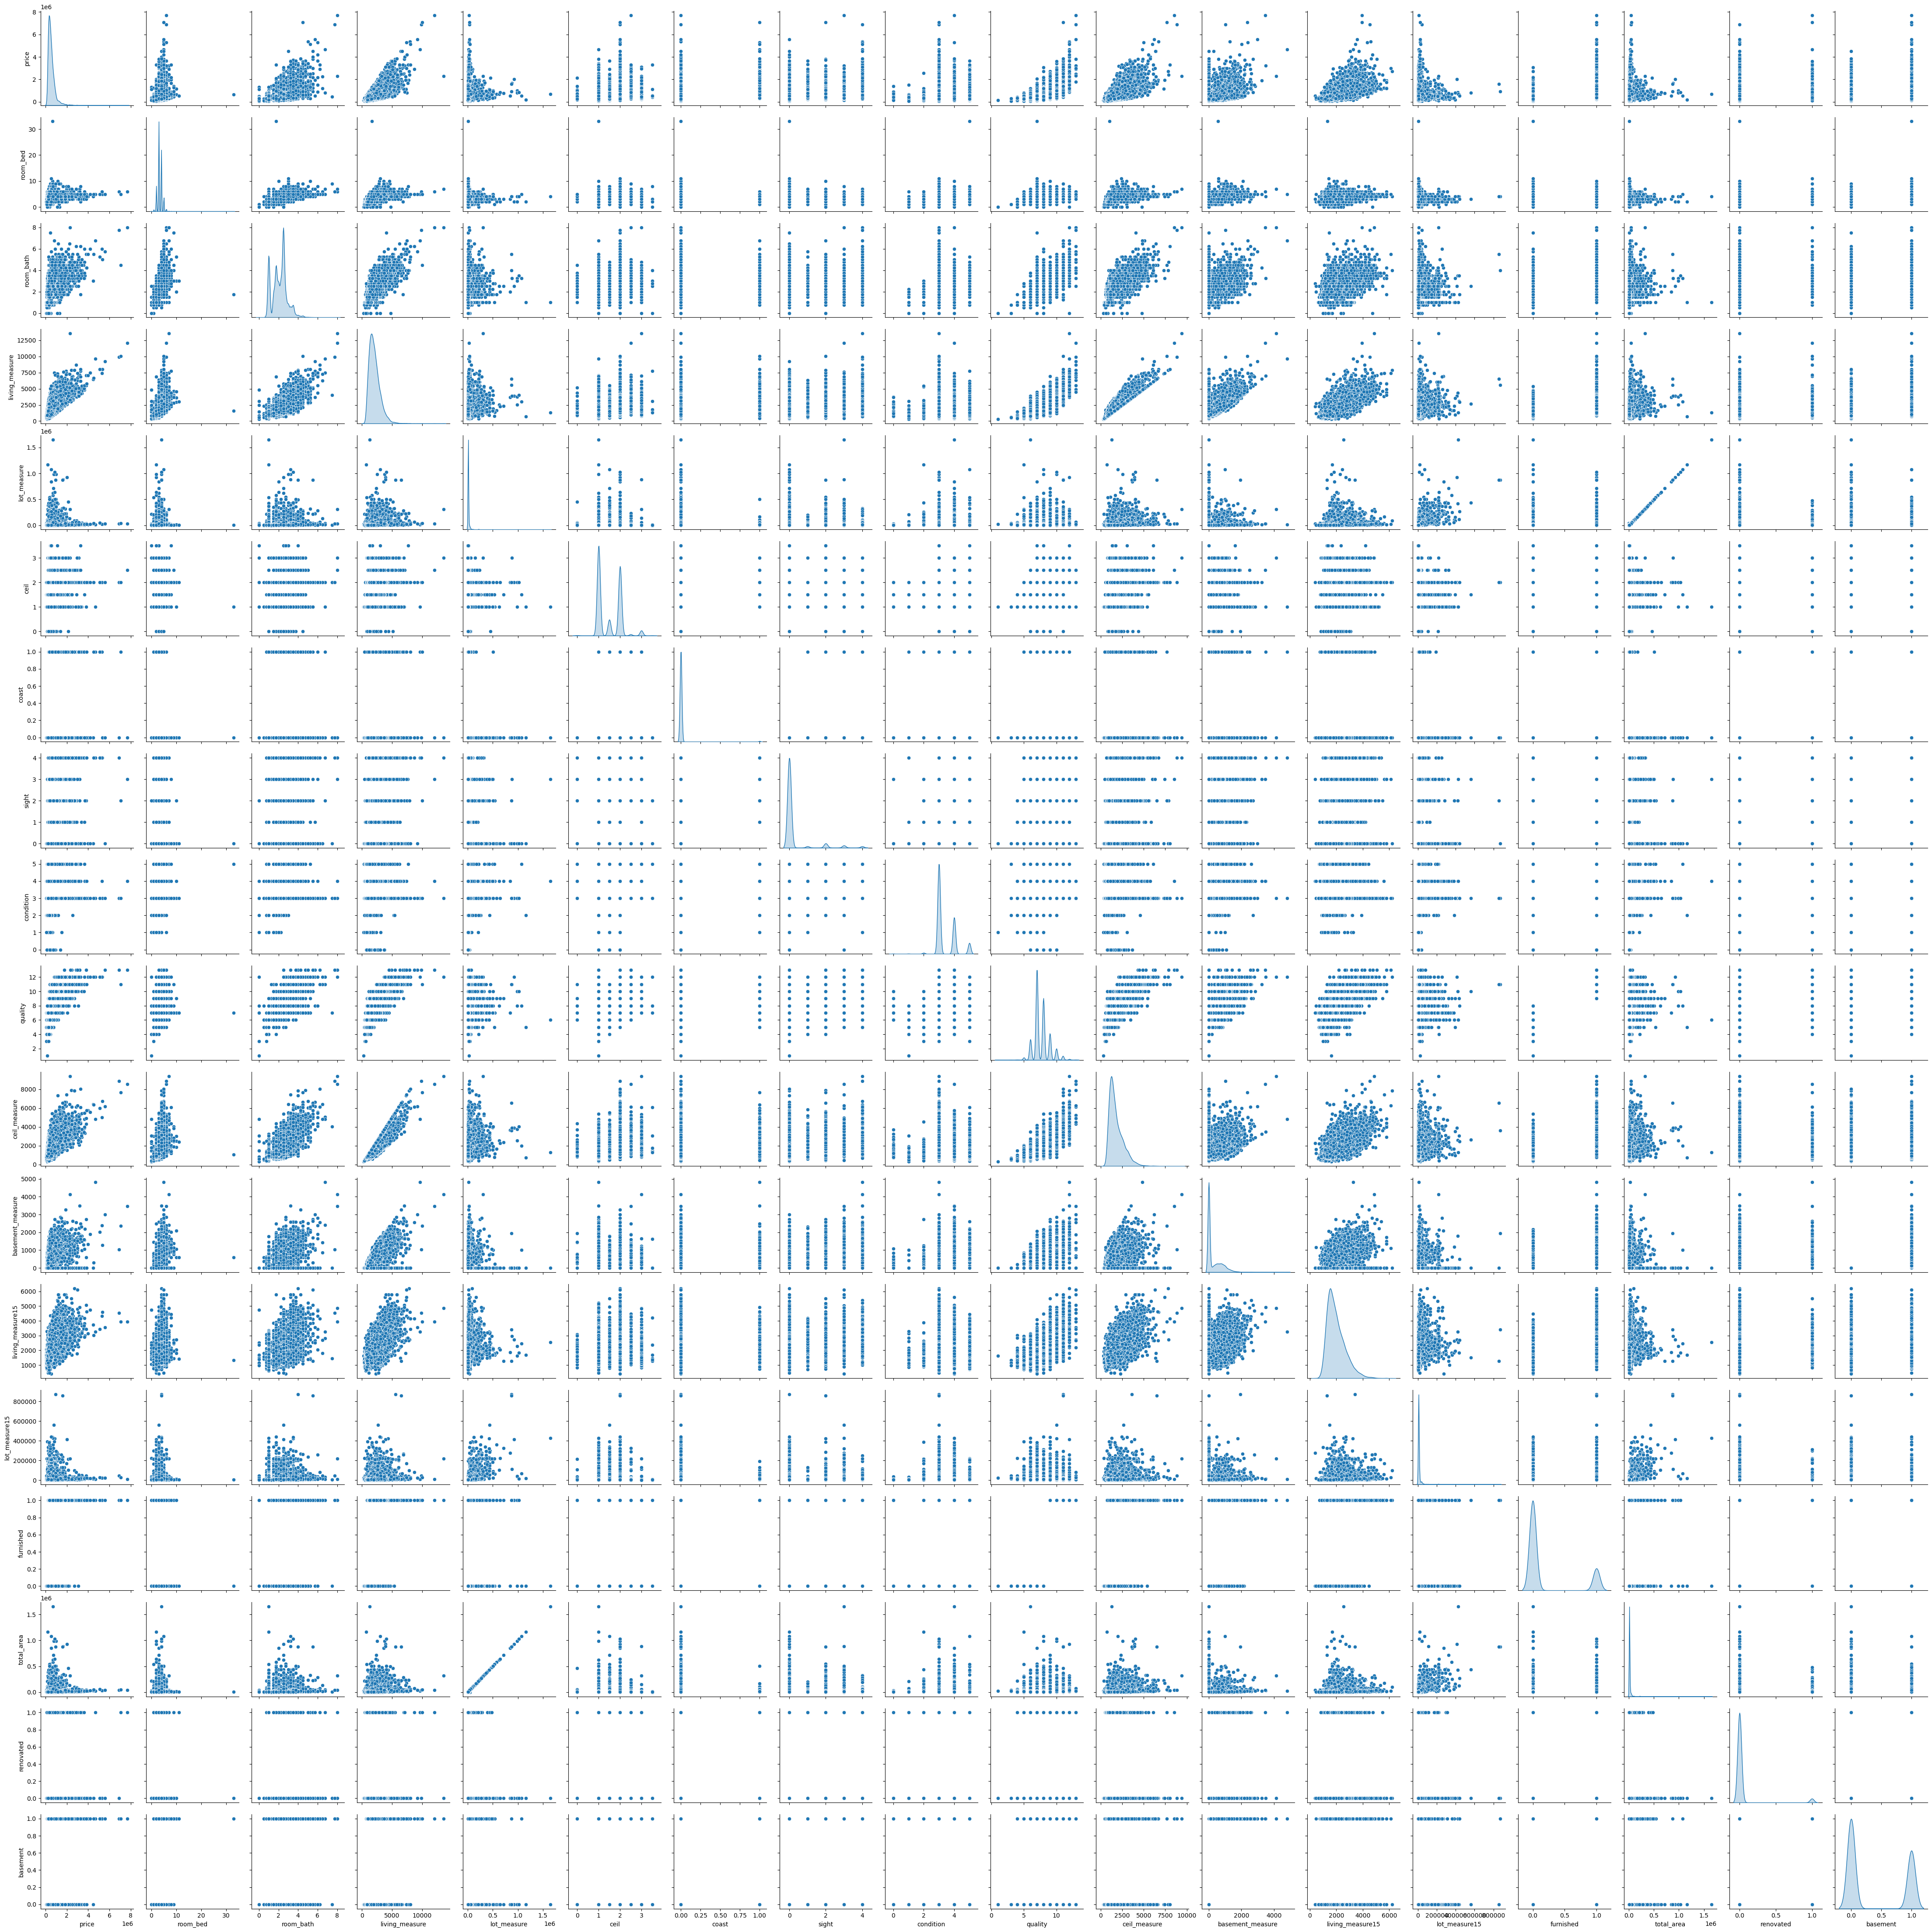

In [69]:
#Bivariate Analysis -
#Pair plot -
sns.pairplot(house_price, diag_kind = 'kde')
plt.show();

In [70]:
house_price.corr()

price  room_bed  room_bath  living_measure  lot_measure  \
price             1.000000  0.308040   0.525179        0.702149     0.089733   
room_bed          0.308040  1.000000   0.515778        0.576447     0.032051   
room_bath         0.525179  0.515778   1.000000        0.754617     0.088055   
living_measure    0.702149  0.576447   0.754617        1.000000     0.172958   
lot_measure       0.089733  0.032051   0.088055        0.172958     1.000000   
ceil              0.255111  0.173724   0.496037        0.351458    -0.006453   
coast             0.266041 -0.006258   0.062129        0.102532     0.021301   
sight             0.397522  0.078367   0.186939        0.284927     0.075144   
condition         0.035709  0.027766  -0.126339       -0.056563    -0.007700   
quality           0.667477  0.356740   0.665037        0.762723     0.113869   
ceil_measure      0.605593  0.477708   0.685556        0.876653     0.183656   
basement_measure  0.323825  0.302569   0.283389        0.435035     0.015400   
living_measure15  0.585186  0.390823   0.568001        0.756188     0.145653   
lot_measure15     0.082603  0.029484   0.087096        0.183548     0.717727   
furnished         0.566040  0.259316   0.485162        0.633157     0.119326   
total_area        0.104850  0.044588   0.104239        0.194267     0.999623   
renovated         0.126101  0.018551   0.049710        0.054983     0.007884   
basement          0.180208  0.162973   0.163105        0.204369    -0.035184   

                      ceil     coast     sight  condition   quality  \
price             0.255111  0.266041  0.397522   0.035709  0.667477   
room_bed          0.173724 -0.006258  0.078367   0.027766  0.356740   
room_bath         0.496037  0.062129  0.186939  -0.126339  0.665037   
living_measure    0.351458  0.102532  0.284927  -0.056563  0.762723   
lot_measure      -0.006453  0.021301  0.075144  -0.007700  0.113869   
ceil              1.000000  0.024676  0.028107  -0.256758  0.455471   
coast             0.024676  1.000000  0.400203   0.017759  0.082513   
sight             0.028107  0.400203  1.000000   0.046232  0.251095   
condition        -0.256758  0.017759  0.046232   1.000000 -0.142681   
quality           0.455471  0.082513  0.251095  -0.142681  1.000000   
ceil_measure      0.520588  0.071329  0.167572  -0.155043  0.755923   
basement_measure -0.244514  0.079237  0.277769   0.172440  0.168403   
living_measure15  0.277223  0.086096  0.280976  -0.094103  0.713114   
lot_measure15    -0.011694  0.030706  0.073020  -0.002005  0.119360   
furnished         0.346062  0.069524  0.219995  -0.120619  0.788717   
total_area        0.001644  0.023294  0.080960  -0.009001  0.129941   
renovated         0.005415  0.088745  0.103219  -0.058949  0.014011   
basement         -0.256087  0.036114  0.181855   0.132484  0.051850   

                  ceil_measure  basement_measure  living_measure15  \
price                 0.605593          0.323825          0.585186   
room_bed              0.477708          0.302569          0.390823   
room_bath             0.685556          0.283389          0.568001   
living_measure        0.876653          0.435035          0.756188   
lot_measure           0.183656          0.015400          0.145653   
ceil                  0.520588         -0.244514          0.277223   
coast                 0.071329          0.079237          0.086096   
sight                 0.167572          0.277769          0.280976   
condition            -0.155043          0.172440         -0.094103   
quality               0.755923          0.168403          0.713114   
ceil_measure          1.000000         -0.051925          0.731558   
basement_measure     -0.051925          1.000000          0.200068   
living_measure15      0.731558          0.200068          1.000000   
lot_measure15         0.194246          0.017539          0.184830   
furnished             0.652616          0.092624          0.620313   
total_area            0.202151

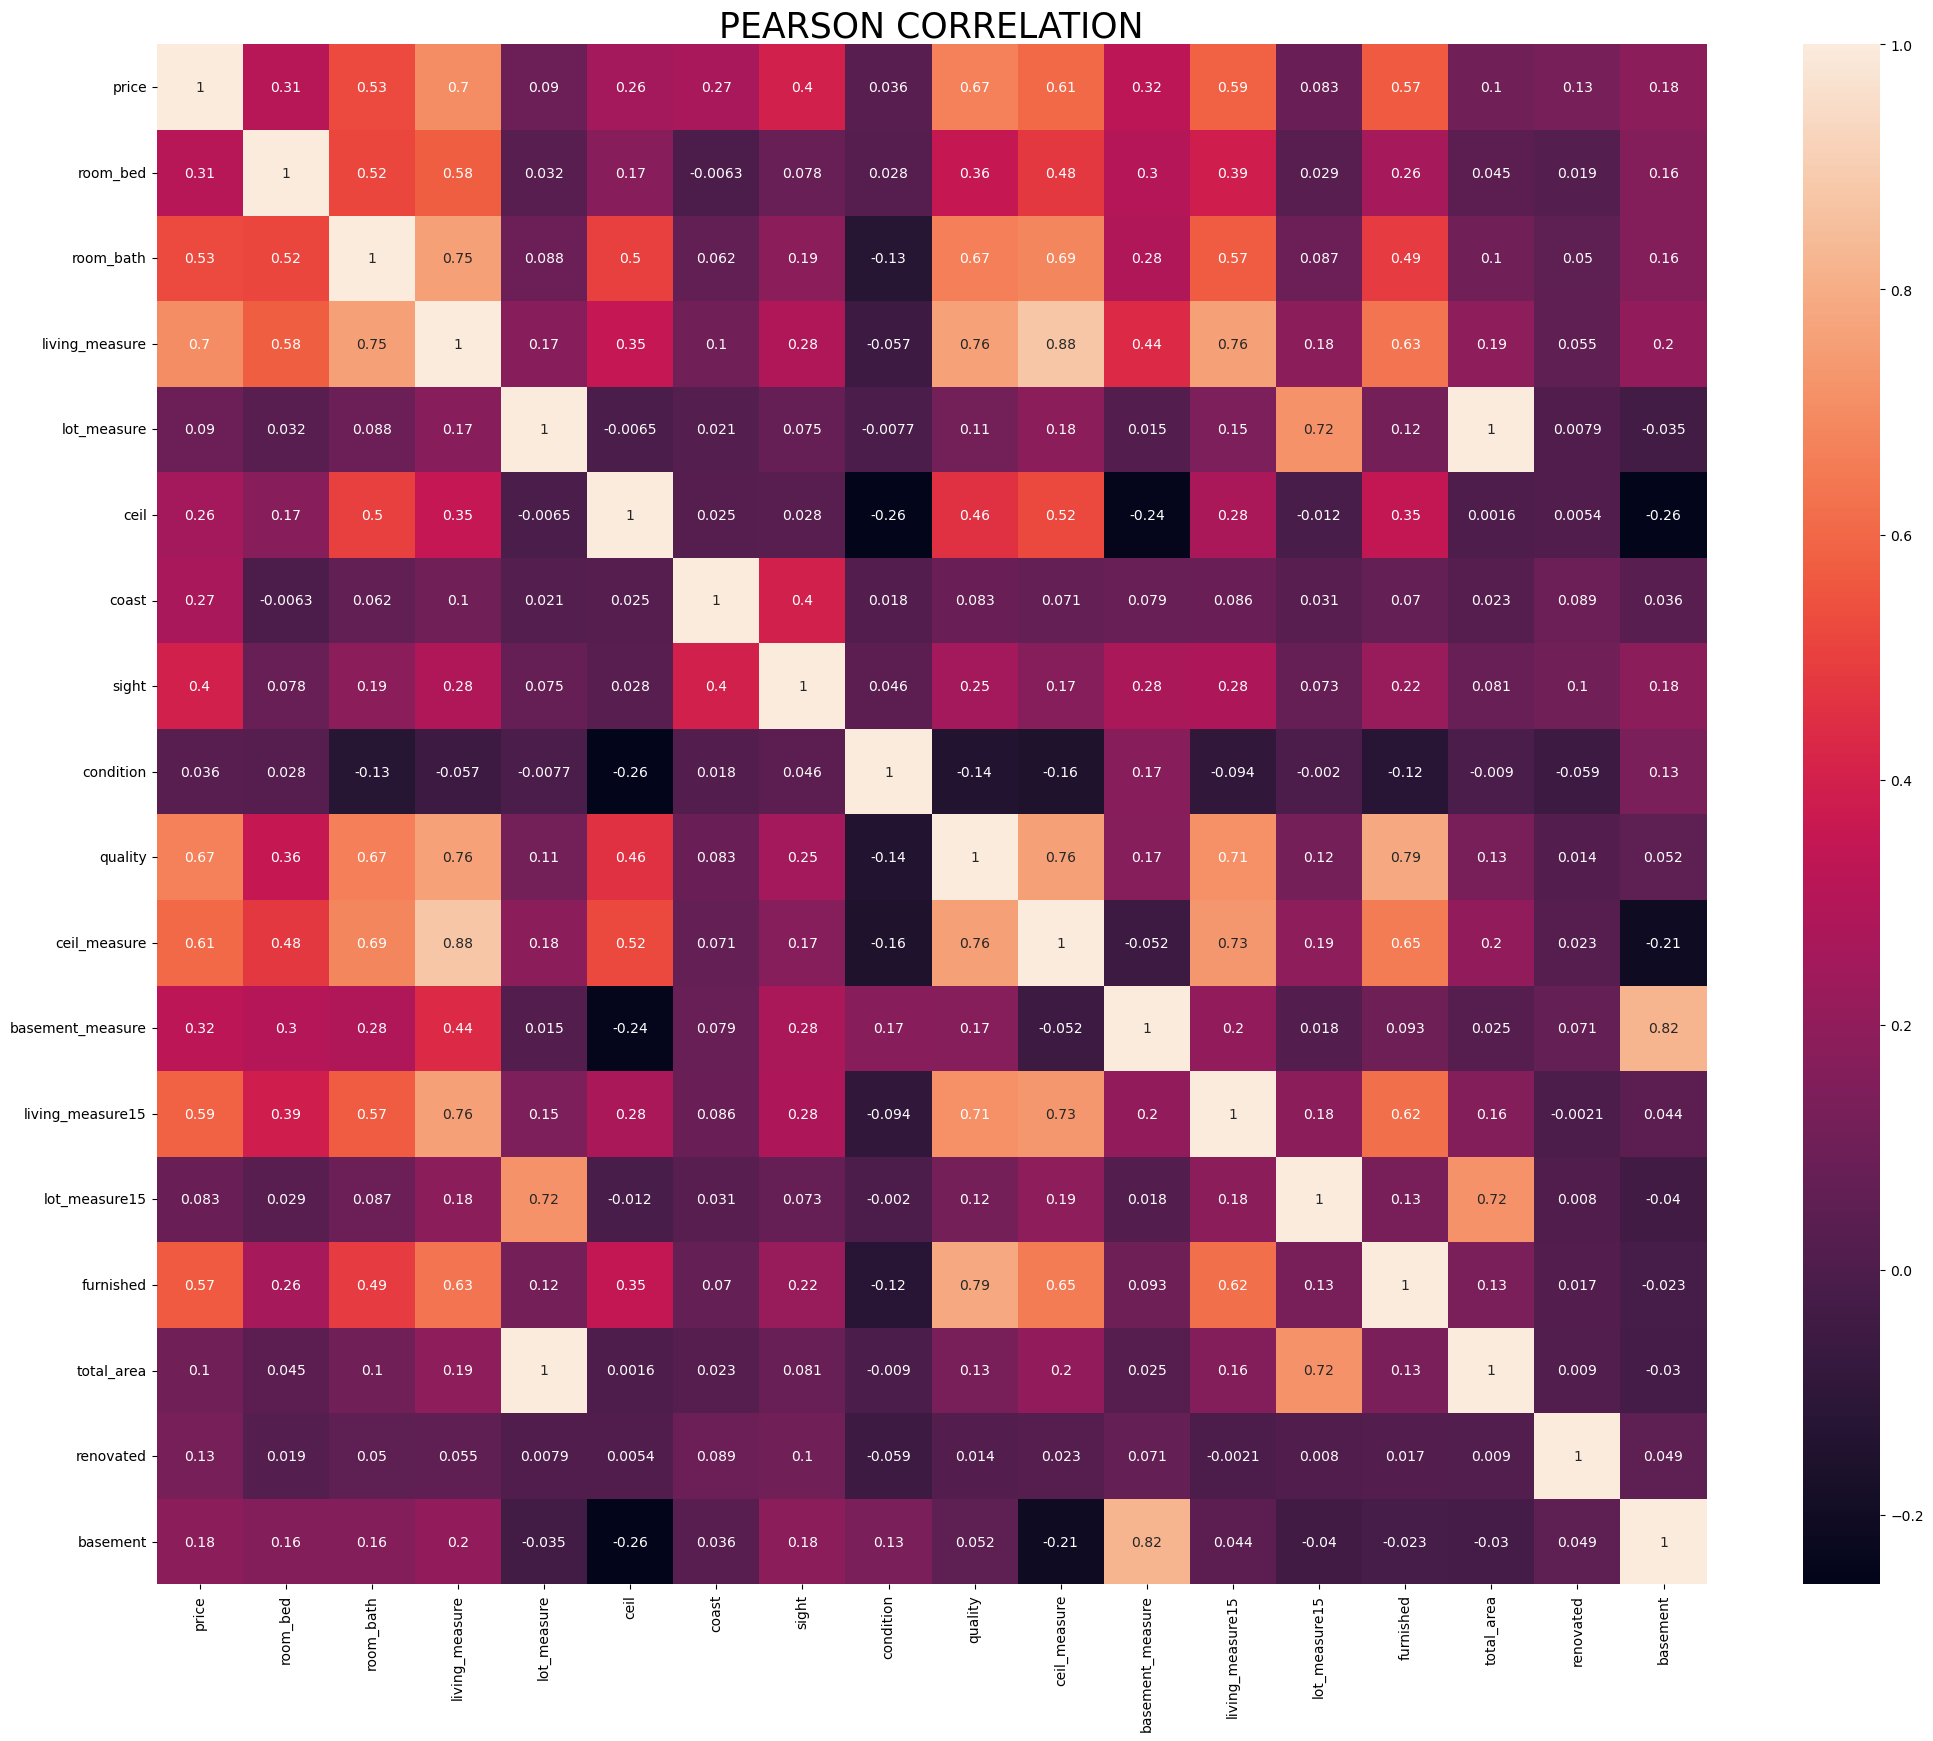

In [71]:
#Pearson Correlation-
plt.figure(figsize = (25,20))
sns.heatmap(house_price.corr(method="pearson"),annot=True)
plt.title('PEARSON CORRELATION', fontsize=25)
plt.show();

In [72]:
#Price on room_bed -
house_price.groupby('room_bed')['price'].agg(['mean','median','size','std'])

mean    median  size            std
room_bed                                             
0.0       4.102231e+05  288000.0    13  360374.846292
1.0       3.189286e+05  299000.0   197  149064.410869
2.0       4.013572e+05  373500.0  2747  198439.441075
3.0       4.662970e+05  413000.0  9767  262922.164168
4.0       6.357284e+05  549950.0  6854  389460.948197
5.0       7.867329e+05  619000.0  1595  597128.941575
6.0       8.274895e+05  652500.0   270  802346.838221
7.0       9.514478e+05  728580.0    38  740350.184560
8.0       1.105077e+06  700000.0    13  897495.725295
9.0       8.939998e+05  817000.0     6  381533.900984
10.0      8.200000e+05  660000.0     3  285832.118559
11.0      5.200000e+05  520000.0     1            NaN
33.0      6.400000e+05  640000.0     1            NaN

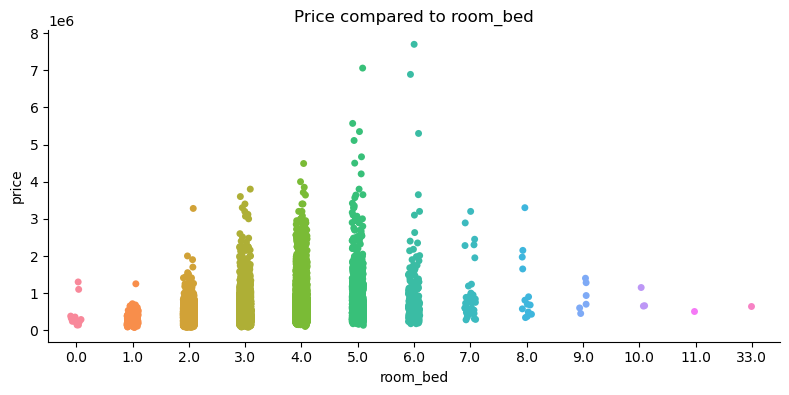

In [73]:
sns.catplot(x='room_bed',y='price',data=house_price, height=4, aspect=2).set(title = "Price compared to room_bed" )
plt.show();

In [74]:
#Price on room_bath -
house_price.groupby('room_bath')['price'].agg(['mean','median','size','std'])

mean     median  size           std
room_bath                                             
0.00       4.490950e+05   317500.0    10  4.172420e+05
0.50       2.373750e+05   264000.0     4  8.888886e+04
0.75       2.945209e+05   273500.0    72  1.380845e+05
1.00       3.470889e+05   320000.0  3829  1.547947e+05
1.25       6.217722e+05   516500.0     9  4.088817e+05
1.50       4.091834e+05   370000.0  1439  1.940879e+05
1.75       4.549409e+05   422800.0  3031  2.023617e+05
2.00       4.575184e+05   422500.0  1917  2.061660e+05
2.25       5.337925e+05   472500.0  2039  2.813512e+05
2.50       5.536595e+05   499950.0  5358  2.671183e+05
2.75       6.605538e+05   605000.0  1178  3.106160e+05
3.00       7.087325e+05   600000.0   750  4.315553e+05
3.25       9.710299e+05   837352.0   588  5.638301e+05
3.50       9.329520e+05   823250.0   726  4.654631e+05
3.75       1.198179e+06  1070000.0   155  5.902669e+05
4.00       1.271616e+06  1060000.0   135  6.948744e+05
4.25       1.535072e+06  1390000.0    78  7.628593e+05
4.50       1.334211e+06  1060000.0   100  8.910568e+05
4.75       2.022300e+06  2300000.0    23  8.672724e+05
5.00       1.674167e+06  1430000.0    21  1.248295e+06
5.25       1.817962e+06  1420000.0    13  1.241665e+06
5.50       2.522500e+06  2340000.0    10  1.254634e+06
5.75       2.492500e+06  1930000.0     4  2.153778e+06
6.00       2.948333e+06  2895000.0     6  1.706475e+06
6.25       3.095000e+06  3095000.0     2  2.899138e+05
6.50       1.710000e+06  1710000.0     2  7.495332e+05
6.75       2.735000e+06  2735000.0     2  2.736503e+06
7.50       4.500000e+05   450000.0     1           NaN
7.75       6.890000e+06  6890000.0     1           NaN
8.00       4.990000e+06  4990000.0     2  3.832519e+06

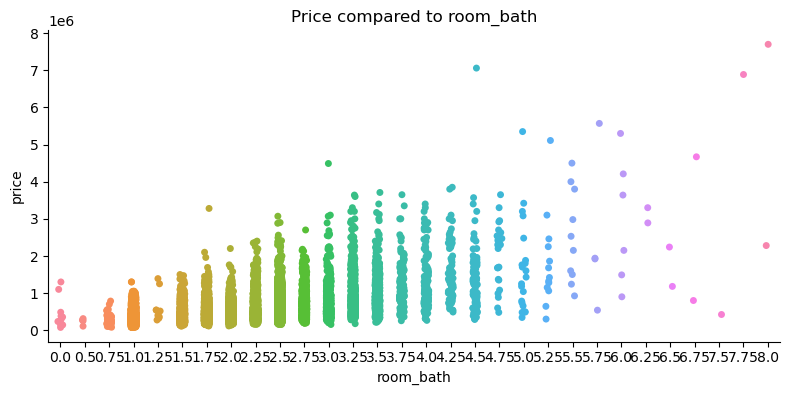

In [75]:
sns.catplot(x='room_bath',y='price',data=house_price, height=4, aspect=2).set(title = "Price compared to room_bath" )
plt.show();

In [76]:
#Price on ceil -
house_price.groupby('ceil')['price'].agg(['mean','median','size','std'])

mean    median   size            std
ceil                                              
0.0   5.952267e+05  447250.0     30  418884.882494
1.0   4.420451e+05  390000.0  10647  263891.623755
1.5   5.593744e+05  525000.0   1905  304009.733984
2.0   6.491210e+05  543250.0   8210  434224.106008
2.5   1.061021e+06  799200.0    161  858836.032602
3.0   5.831248e+05  490500.0    610  338914.723996
3.5   9.339375e+05  534500.0      8  978736.081364

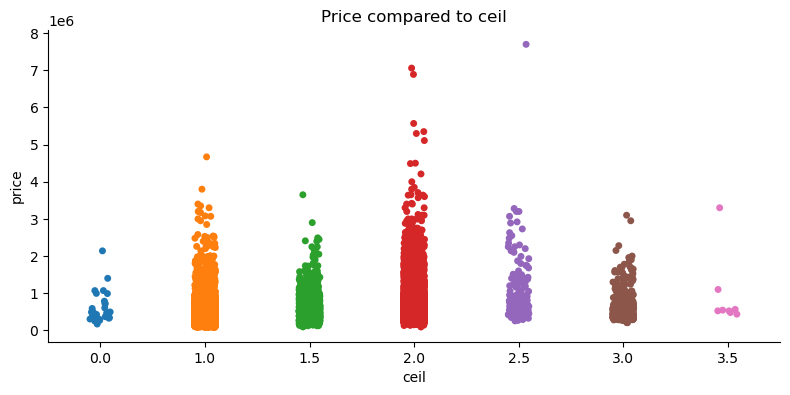

In [77]:
sns.catplot(x='ceil',y='price',data=house_price, height=4, aspect=2).set(title = "Price compared to ceil" )
plt.show();

In [78]:
#Price on coast -
house_price.groupby('coast')['price'].agg(['mean','median','size','std'])

mean     median   size           std
coast                                              
0.0    5.317250e+05   450000.0  21451  3.418950e+05
1.0    1.668301e+06  1410000.0    161  1.125927e+06

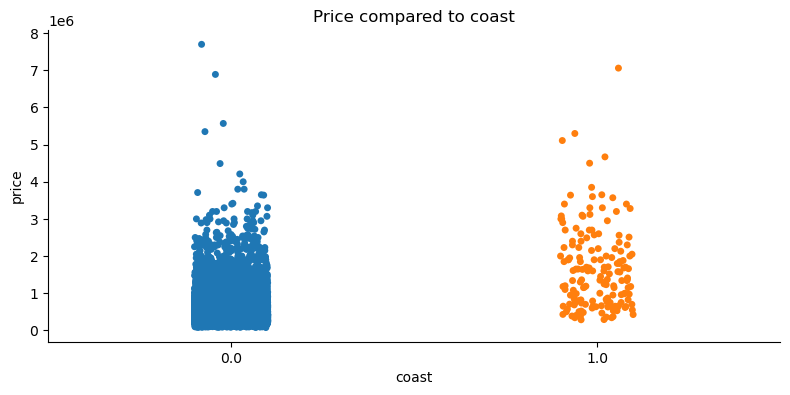

In [79]:
sns.catplot(x='coast',y='price',data=house_price, height=4, aspect=2).set(title = "Price compared to coast" )
plt.show();

In [80]:
#Price on quality -
house_price.groupby('quality')['price'].agg(['mean','median','size','std'])

mean     median  size           std
quality                                             
1.0      1.420000e+05   142000.0     1           NaN
3.0      2.056667e+05   262000.0     3  1.135180e+05
4.0      2.143810e+05   205000.0    29  9.430617e+04
5.0      2.485240e+05   228700.0   242  1.181003e+05
6.0      3.019166e+05   275276.5  2038  1.229522e+05
7.0      4.025933e+05   375000.0  8981  1.558953e+05
8.0      5.429310e+05   510000.0  6067  2.176135e+05
9.0      7.737382e+05   720000.0  2615  3.165221e+05
10.0     1.072347e+06   914327.0  1134  4.840508e+05
11.0     1.497792e+06  1280000.0   399  7.051274e+05
12.0     2.192500e+06  1820000.0    90  1.027337e+06
13.0     3.710769e+06  2980000.0    13  1.859545e+06

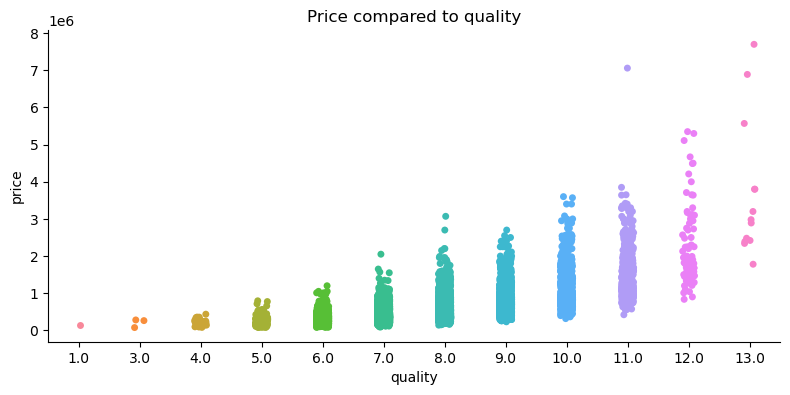

In [81]:
sns.catplot(x='quality',y='price',data=house_price, height=4, aspect=2).set(title = "Price compared to quality" )
plt.show();

In [82]:
sns.set()
sns.set_palette(palette='deep')
import folium
from folium.plugins import FastMarkerCluster

In [83]:
## Let's study Latitude and Longitue features 
#Houses in Seattle-
lat = house_price_1['lat'].tolist()
lon = house_price_1['long'].tolist()
locations = list(zip(lat, lon))
map1 = folium.Map(location = (47.550579, -121.981752),zoom_start=10)
FastMarkerCluster(locations).add_to(map1)
map1

In [84]:
#Houses in France-
lat = house_price_1['lat'].tolist()
lon = house_price_1['long'].tolist()
locations = list(zip(lat, lon))
map2 = folium.Map(location = (47.49729, -0.10114),zoom_start=10)
FastMarkerCluster(locations).add_to(map2)
map2

In [85]:
#Missing values in the dataset -
house_price.isnull().sum().sort_index()

basement              1
basement_measure      1
ceil                 42
ceil_measure          1
coast                 1
condition            57
furnished            29
living_measure       17
living_measure15    166
lot_measure          42
lot_measure15        29
price                 0
quality               1
renovated             0
room_bath           108
room_bed            108
sight                57
total_area           29
dtype: int64

In [86]:
#Replacing null values -
house_price["basement_measure"].replace(np.nan,house_price["basement_measure"].median(),inplace=True)
house_price["ceil_measure"].replace(np.nan,house_price["ceil_measure"].median(),inplace=True)
house_price["living_measure"].replace(np.nan,house_price["living_measure"].median(),inplace=True)
house_price["living_measure15"].replace(np.nan,house_price["living_measure15"].median(),inplace=True)
house_price["lot_measure"].replace(np.nan,house_price["lot_measure"].median(),inplace=True)
house_price["lot_measure15"].replace(np.nan,house_price["lot_measure15"].median(),inplace=True)
house_price["total_area"].replace(np.nan,house_price["total_area"].median(),inplace=True)

In [87]:
#Dropping house with 33 bed rooms -
house_price.drop(house_price[ (house_price.room_bed == 33) ].index, inplace=True)

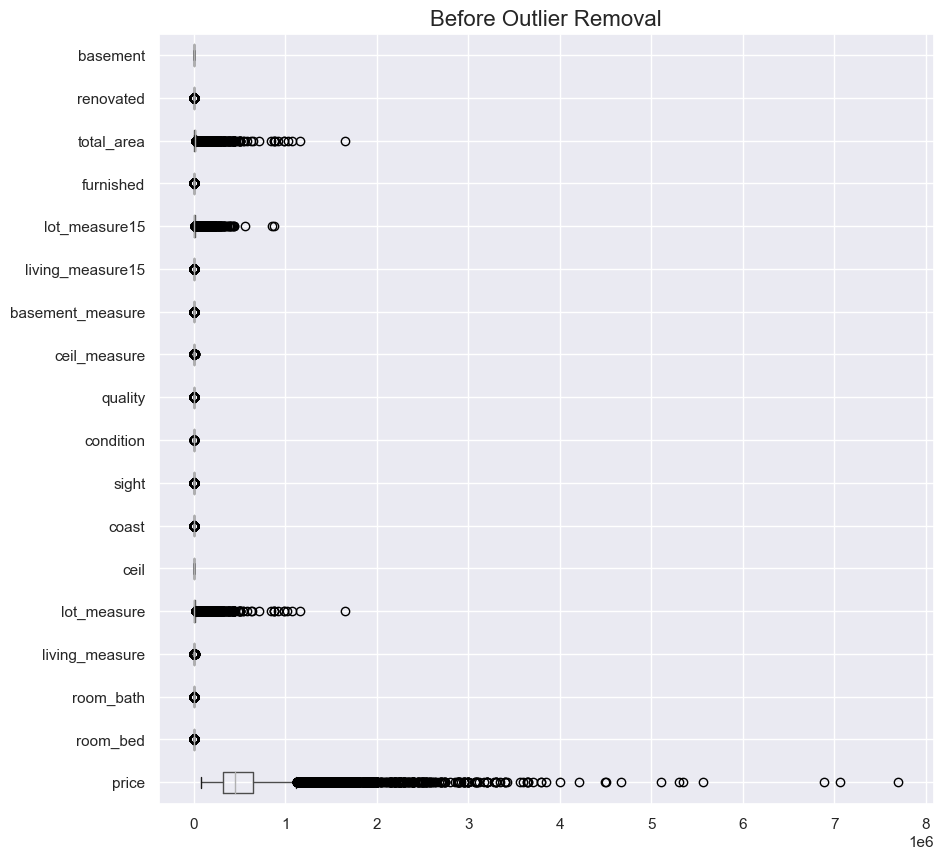

In [88]:
#Variables with outliers -
cont=house_price.dtypes[(house_price.dtypes!='uint8') & (house_price.dtypes!='bool')].index
plt.figure(figsize=(10,10))
house_price[cont].boxplot(vert=0)
plt.title('Before Outlier Removal',fontsize=16)
plt.show()

In [89]:
#Treating outliers with IQR -
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [90]:
for column in house_price[cont[:16]].columns:
    lr,ur=remove_outlier(house_price[column])
    house_price[column]=np.where(house_price[column]>ur,ur,house_price[column])
    house_price[column]=np.where(house_price[column]<lr,lr,house_price[column])

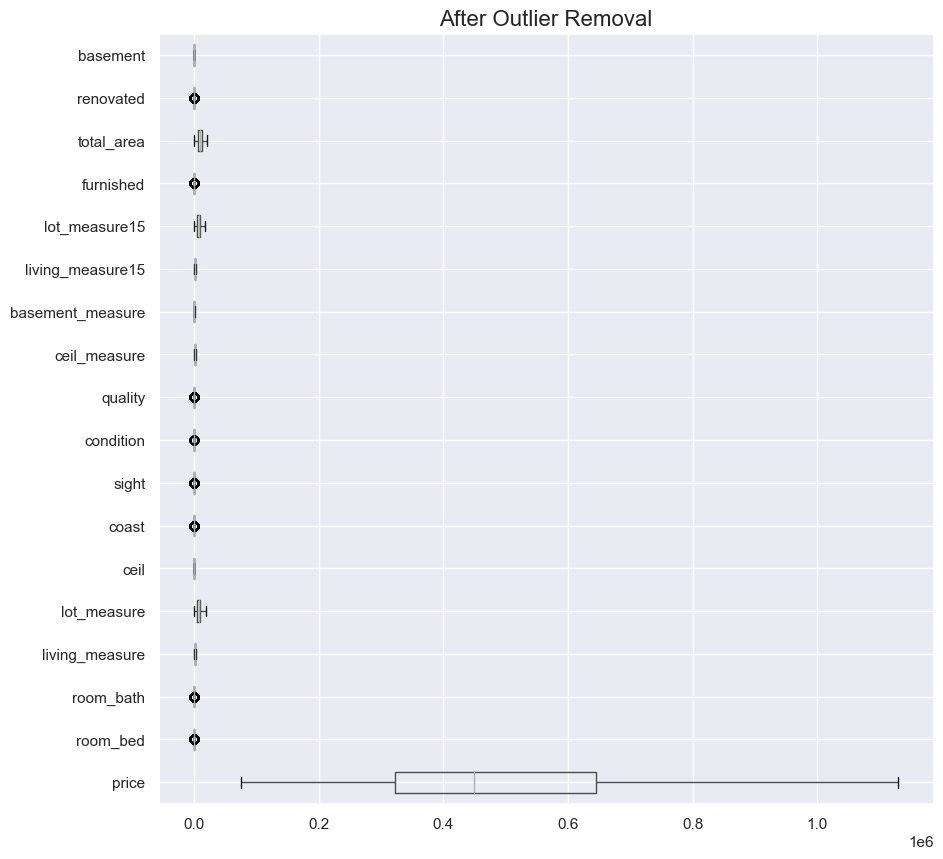

In [91]:
#After outlier treatment -
plt.figure(figsize=(10,10))
house_price[cont].boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

In [92]:
house_price.isnull().sum().sort_index()

basement              1
basement_measure      0
ceil                 42
ceil_measure          0
coast                 1
condition            57
furnished            29
living_measure        0
living_measure15      0
lot_measure           0
lot_measure15         0
price                 0
quality               1
renovated             0
room_bath           108
room_bed            108
sight                57
total_area            0
dtype: int64

In [93]:
house_price.shape

(21612, 18)

In [94]:
# Getting dummies for columns coast, sight, renovated, furnished, basement -
df = pd.get_dummies(house_price, columns=['coast', 'sight', 'furnished', 
                                         'renovated','basement'],drop_first=True)

In [95]:
df.shape

(21612, 21)

In [96]:
df.columns

Index(['price', 'room_bed', 'room_bath', 'living_measure', 'lot_measure',
       'ceil', 'condition', 'quality', 'ceil_measure', 'basement_measure',
       'living_measure15', 'lot_measure15', 'total_area', 'coast_1.0',
       'sight_1.0', 'sight_2.0', 'sight_3.0', 'sight_4.0', 'furnished_1.0',
       'renovated_1.0', 'basement_1.0'],
      dtype='object')

In [97]:
df[df['condition']==0]

price  room_bed  room_bath  living_measure  lot_measure  ceil  \
2099    399950.00       NaN        NaN          2450.0    15001.000   1.0   
3375    525000.00       NaN        NaN          1600.0     7400.000   1.0   
5329    395000.00       NaN        NaN          1450.0     1263.000   2.0   
5407    340000.00       NaN        NaN          1570.0    14992.000   1.0   
5520    825000.00       NaN        NaN          3760.0     5260.000   2.0   
5953   1129743.75       NaN        NaN          2910.0    10044.000   2.0   
7831    571000.00       NaN        NaN          1350.0     4000.000   1.5   
8146    730000.00       NaN        NaN          1650.0     5000.000   1.5   
8406    286950.00       NaN        NaN          2080.0     9846.000   1.0   
10783   575000.00       NaN        NaN          1580.0    11750.000   1.0   
13244   305000.00       NaN        NaN          1290.0     3383.000   2.0   
13604   607010.00       NaN        NaN          2180.0     4000.000   2.0   
13654   346300.00       NaN        NaN          2590.0    11018.000   2.0   
13791   435010.00       NaN        NaN          1270.0     4000.000   1.0   
13922   608000.00       NaN        NaN          2690.0     4736.000   2.0   
14172   275000.00       NaN        NaN          1270.0    19086.125   1.0   
14478   939000.00       NaN        NaN          2240.0     9684.000   2.0   
14870   870000.00       NaN        NaN          3010.0     4887.000   2.0   
15454   158000.00       NaN        NaN          1090.0     6090.000   1.0   
15664   299900.00       NaN        NaN          1560.0    19086.125   1.0   
15888   261500.00       NaN        NaN          1410.0     8174.000   1.0   
18019   480000.00       NaN        NaN           710.0     4800.000   1.0   
18607   435000.00       NaN        NaN          1380.0     2500.000   1.0   
18784   214950.00       NaN        NaN          1400.0     6600.000   1.0   
19064   500000.00       NaN        NaN          2100.0    12620.000   1.0   
20901   135000.00       NaN        NaN           790.0    13062.000   1.0   
21052   725000.00       NaN        NaN          3690.0     8837.000   2.0   
21109   408000.00       NaN        NaN          1200.0     3900.000   1.0   

       condition  quality  ceil_measure  basement_measure  living_measure15  \
2099         0.0      7.0        1980.0             470.0            1840.0   
3375         0.0      7.0        1210.0             390.0            1840.0   
5329         0.0      8.0        1160.0             290.0            1840.0   
5407         0.0      8.0        1570.0               0.0            1840.0   
5520         0.0      9.0        3230.0             530.0            1840.0   
5953         0.0     10.0        2910.0               0.0            1840.0   
7831         0.0      8.0        1350.0               0.0            1840.0   
8146         0.0      8.0        1650.0               0.0            1840.0   
8406         0.0      7.0        1240.0             840.0            1840.0   
10783        0.0      7.0        1180.0             400.0            1840.0   
13244        0.0      7.0        1290.0               0.0            1840.0   
13604        0.0      8.0        1700.0             480.0            1840.0   
13654        0.0      8.0        2590.0               0.0            1840.0   
13791        0.0      7.0        1120.0             150.0            1840.0   
13922        0.0      7.0        2690.0               0.0            1840.0   
14172        0.0      7.0        1270.0               0.0            1840.0   
14478        0.0      9.0        2240.0               0.0            1840.0   
14870        0.0     10.0        1940.0            1070.0            1840.0   
15454        0.0      7.0         940.0             150.0            1840.0   
15664        0.0      7.0        1290.0             270.0            1840.0   
15888        0.0      8.0        1410.0               0.0            1840.0   
18019        0.0      6.0         710.0 

In [98]:
df["condition"].unique()

array([ 3.,  4.,  5.,  2., nan,  1.,  0.])

In [99]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [100]:
df['condition']= label_encoder.fit_transform(df['condition'])
  
df['condition'].unique()

array([3, 4, 5, 2, 6, 1, 0], dtype=int64)

In [101]:
df.drop(df[ (df.condition == 0) ].index, inplace=True)

In [102]:
df["quality"].unique()

array([ 8.,  6.,  7., 10.,  9.,  5., 11., 13.,  4., 12.,  1.,  3., nan])

In [103]:
df['quality']= label_encoder.fit_transform(df['quality'])
  
df['quality'].unique()

array([ 6,  4,  5,  8,  7,  3,  9, 11,  2, 10,  0,  1, 12], dtype=int64)

In [104]:
df[df['quality']==0]

price  room_bed  room_bath  living_measure  lot_measure  ceil  \
3405  142000.0       0.0        0.0           290.0    19086.125   1.0   

      condition  quality  ceil_measure  basement_measure  living_measure15  \
3405          1        0         290.0               0.0            1620.0   

      lot_measure15  total_area  coast_1.0  sight_1.0  sight_2.0  sight_3.0  \
3405        17550.0     21165.0          0          0          0          0   

      sight_4.0  furnished_1.0  renovated_1.0  basement_1.0  
3405          0              0              0             0

In [105]:
df.drop(df[ (df.condition == 0) ].index, inplace=True)

In [106]:
df.ceil.unique()

array([1. , 2. , 3. , 1.5, 2.5, 0. , nan, 3.5])

In [107]:
df['ceil']= label_encoder.fit_transform(df['ceil'])
  
df['ceil'].unique()

array([1, 3, 5, 2, 4, 0, 7, 6], dtype=int64)

In [108]:
df[df['ceil']==0]

price  room_bed  room_bath  living_measure  lot_measure  ceil  \
193     390000.00       3.0       2.50          1910.0     4755.000     0   
1241    732000.00       3.0       2.00          1940.0    19086.125     0   
1927    589000.00       3.0       1.50          1390.0     5040.000     0   
3107   1129743.75       4.0       3.75          4230.0    19086.125     0   
3534    995000.00       3.0       4.50          4230.0    19086.125     0   
3569    367000.00       4.0       2.50          2350.0     8182.000     0   
3791    340000.00       2.0       1.00          1700.0     6718.000     0   
4115   1070000.00       2.0       2.25          3900.0    14864.000     0   
5467    605000.00       4.0       2.25          2940.0    19086.125     0   
5636   1070000.00       5.0       3.50          2920.0     3000.000     0   
6604    990000.00       3.0       3.25          2460.0     4182.000     0   
6844    490000.00       3.0       1.75          1660.0     8208.000     0   
10282   170000.00       2.0       1.00           810.0     8424.000     0   
10812   299000.00       3.0       1.00          1040.0     9514.000     0   
10911   337000.00       4.0       2.50          2470.0     5100.000     0   
10932   467000.00       3.0       2.50          1530.0     3984.000     0   
10947   495000.00       4.0       3.00          2740.0     2811.000     0   
11839   352800.00       4.0       2.00          2080.0     6360.000     0   
12853   785000.00       3.0       3.00          1950.0     1983.000     0   
14121   708000.00       4.0       2.50          3090.0     5600.000     0   
14824   340000.00       3.0       1.75          1210.0     9635.000     0   
14835   252000.00       2.0       1.00           940.0    15450.000     0   
15308   305000.00       3.0       3.00          1290.0     1112.000     0   
15363   327500.00       3.0       2.50          1820.0     1866.000     0   
15657   427500.00       3.0       1.50          1900.0    19086.125     0   
16097   305000.00       5.0       2.25          2660.0     8400.000     0   
16154  1129743.75       3.0       2.75          3130.0    19086.125     0   
16279   350000.00       3.0       2.00          1320.0     1298.000     0   
18518   490000.00       4.0       2.25          2020.0     4960.000     0   
19116   268000.00       5.0       2.50          2400.0     4564.000     0   

       condition  quality  ceil_measure  basement_measure  living_measure15  \
193            3        6        1910.0               0.0            2460.0   
1241           5        7        1940.0               0.0            2330.0   
1927           3        5        1090.0             300.0            1910.0   
3107           3        9        3740.0             790.0            2500.0   
3534           3        7        3720.0             660.0            2460.0   
3569           3        6        2350.0               0.0            2330.0   
3791           3        5        1230.0             470.0            2040.0   
4115           3        6        1950.0            1400.0            2580.0   
5467           5        5        1520.0            1400.0            2470.0   
5636           3        7        2260.0             660.0            1580.0   
6604           5        6        2100.0             360.0            2370.0   
6844           4        6        1660.0               0.0            2210.0   
10282          4        4         810.0               0.0             820.0   
10812          4        5        1040.0               0.0            1040.0   
10911          3        6        2470.0               0.0            2240.0   
10932          3        6        1530.0               0.0            1720.0   
10947          3        6        2240.0             500.0            2740.0   
11839          3        5        1330.0             750.0            2080.0   
12853          3        7        1610.0             340.0            2040.0   
14121          3        7        3090.0     

In [109]:
df.drop(df[ (df.ceil == 0) ].index, inplace=True)

In [110]:
df.room_bed.unique()

array([ 4.,  2.,  3.,  1.,  5.,  6., nan,  7., 10.,  8.,  0.,  9., 11.])

In [111]:
df['room_bed']= label_encoder.fit_transform(df['room_bed'])
  
df['room_bed'].unique()

array([ 4,  2,  3,  1,  5,  6, 12,  7, 10,  8,  0,  9, 11], dtype=int64)

In [112]:
df[df['room_bed']==0]

price  room_bed  room_bath  living_measure  lot_measure  ceil  \
3155   1129743.75         0       0.00          4230.0    19086.125     3   
3286    339950.00         0       2.50          2290.0     8319.000     3   
3405    142000.00         0       0.00           290.0    19086.125     1   
4238    235000.00         0       0.00          1470.0     4800.000     3   
8340    320000.00         0       2.50          1490.0     7111.000     3   
8877    288000.00         0       1.50          1430.0     1650.000     5   
14922   265000.00         0       0.75           384.0    19086.125     1   
15593   380000.00         0       0.00          1470.0      979.000     5   
17704   355000.00         0       0.00          2460.0     8049.000     3   
17859   228000.00         0       1.00           390.0     5900.000     1   
18283   240000.00         0       2.50          1810.0     5669.000     3   
18596   139950.00         0       0.00           844.0     4269.000     1   
20957  1100000.00         0       0.00          3064.0     4764.000     6   

       condition  quality  ceil_measure  basement_measure  living_measure15  \
3155           3       10        3740.0               0.0            3665.0   
3286           3        6        2290.0               0.0            2500.0   
3405           1        0         290.0               0.0            1620.0   
4238           3        5        1470.0               0.0            1060.0   
8340           3        5        1490.0               0.0            1500.0   
8877           3        5        1430.0               0.0            1430.0   
14922          3        2         384.0               0.0            1920.0   
15593          3        6        1470.0               0.0            1470.0   
17704          3        6        2460.0               0.0            2520.0   
17859          2        2         390.0               0.0            2170.0   
18283          3        5        1810.0               0.0            1810.0   
18596          4        5         844.0               0.0            1380.0   
20957          3        5        3064.0               0.0            2360.0   

       lot_measure15  total_area  coast_1.0  sight_1.0  sight_2.0  sight_3.0  \
3155         17550.0     21895.0          0          0          0          0   
3286          8751.0     10609.0          0          0          0          0   
3405         17550.0     21165.0          0          0          0          0   
4238          7200.0      6270.0          0          0          0          0   
8340          4675.0      8601.0          0          0          0          0   
8877          1650.0      3080.0          0          0          0          0   
14922        17550.0     21895.0          0          0          0          0   
15593         1399.0      2449.0          0          0          1          0   
17704         8050.0     10509.0          0          0          0          0   
17859         6000.0      6290.0          0          0          0          0   
18283         5685.0      7479.0          0          0          0          0   
18596         9600.0      5113.0          0          0          0          0   
20957         4000.0      7828.0          0          0          1          0   

       sight_4.0  furnished_1.0  renovated_1.0  basement_1.0  
3155           0              1              0             0  
3286           0              0              0             0  
3405           0              0              0             0  
4238           0              0              0             0  
8340           0              0              0             0  
8877           0              0              0             0  
14922          0              0              0             0  
15593          0              0              0             0  
17704          0              0              0             0  
17859          0              0              0             0  
18283       

In [113]:
df.drop(df[ (df.room_bed == 0) ].index, inplace=True)

In [114]:
df.room_bath.unique()

array([1.75, 1.  , 2.75, 2.5 , 1.5 , 3.5 , 2.  , 2.25, 3.  , 4.  , 3.25,
       3.75,  nan, 5.  , 0.75, 5.5 , 4.25, 4.5 , 4.75, 8.  , 6.75, 5.25,
       6.  , 1.25, 5.75, 0.  , 7.5 , 6.5 , 0.5 , 7.75, 6.25])

In [115]:
df['room_bath']= label_encoder.fit_transform(df['room_bath'])
  
df['room_bath'].unique()

array([ 6,  3, 10,  9,  5, 13,  7,  8, 11, 15, 12, 14, 30, 19,  2, 21, 16,
       17, 18, 29, 26, 20, 23,  4, 22,  0, 27, 25,  1, 28, 24],
      dtype=int64)

In [116]:
df[df['room_bath']==0]

price  room_bed  room_bath  living_measure  lot_measure  ceil  \
4730   484000.0         1          0           690.0    19086.125     1   
17946   75000.0         1          0           670.0    19086.125     1   
20355  280000.0         1          0           600.0    19086.125     1   

       condition  quality  ceil_measure  basement_measure  living_measure15  \
4730           4        5         690.0               0.0            1690.0   
17946          3        1         670.0               0.0            1160.0   
20355          2        1         600.0               0.0             990.0   

       lot_measure15  total_area  coast_1.0  sight_1.0  sight_2.0  sight_3.0  \
4730         17550.0     21895.0          0          0          0          0   
17946        17550.0     21895.0          0          0          0          0   
20355        17550.0     21895.0          0          0          0          0   

       sight_4.0  furnished_1.0  renovated_1.0  basement_1.0  
4730           0              0              0             0  
17946          0              0              0             0  
20355          0              0              0             0

In [117]:
df.drop(df[ (df.room_bath == 0) ].index, inplace=True)

In [118]:
df.head()

price  room_bed  room_bath  living_measure  lot_measure  ceil  \
0  600000.0         4          6          3050.0       9440.0     1   
1  190000.0         2          3           670.0       3101.0     1   
2  735000.0         4         10          3040.0       2415.0     3   
3  257000.0         3          9          1740.0       3721.0     3   
4  450000.0         2          3          1120.0       4590.0     1   

   condition  quality  ceil_measure  basement_measure  living_measure15  \
0          3        6        1800.0            1250.0            2020.0   
1          4        4         670.0               0.0            1660.0   
2          3        6        3040.0               0.0            2620.0   
3          3        6        1740.0               0.0            2030.0   
4          3        5        1120.0               0.0            1120.0   

   lot_measure15  total_area  coast_1.0  sight_1.0  sight_2.0  sight_3.0  \
0         8660.0     12490.0          0          0          0          0   
1         4100.0      3771.0          0          0          0          0   
2         2433.0      5455.0          1          0          0          0   
3         3794.0      5461.0          0          0          0          0   
4         5100.0      5710.0          0          0          0          0   

   sight_4.0  furnished_1.0  renovated_1.0  basement_1.0  
0          0              0              0             1  
1          0              0              0             0  
2          1              0              0             0  
3          0              0              0             0  
4          0              0              0             0

In [119]:
df.describe().apply(lambda s: s.apply('{0:.5f}'.format))

price     room_bed    room_bath living_measure  lot_measure  \
count    21538.00000  21538.00000  21538.00000    21538.00000  21538.00000   
mean    511680.36769      3.40445      7.54722     2058.28981   8693.03805   
std     249951.99181      1.04413      3.35993      838.28523   5020.50024   
min      78000.00000      1.00000      1.00000      370.00000    520.00000   
25%     322000.00000      3.00000      6.00000     1430.00000   5050.00000   
50%     450000.00000      3.00000      8.00000     1910.00000   7618.00000   
75%     645000.00000      4.00000      9.00000     2550.00000  10658.25000   
max    1129743.75000     12.00000     30.00000     4230.00000  19086.12500   

              ceil    condition      quality ceil_measure basement_measure  \
count  21538.00000  21538.00000  21538.00000  21538.00000      21538.00000   
mean       1.99791      3.41643      5.65814   1769.82654        284.27041   
std        1.10074      0.66297      1.17428    763.82020        417.24788   
min        1.00000      1.00000      1.00000    370.00000          0.00000   
25%        1.00000      3.00000      5.00000   1190.00000          0.00000   
50%        2.00000      3.00000      5.00000   1560.00000          0.00000   
75%        3.00000      4.00000      6.00000   2210.00000        560.00000   
max        7.00000      6.00000     12.00000   3740.00000       1400.00000   

      living_measure15 lot_measure15   total_area    coast_1.0    sight_1.0  \
count      21538.00000   21538.00000  21538.00000  21538.00000  21538.00000   
mean        1974.83192    8297.27728  10754.09483      0.00748      0.01541   
std          647.18258    4357.34845   5414.79380      0.08614      0.12320   
min          399.00000     651.00000      0.00000      0.00000      0.00000   
25%         1490.00000    5100.00000   7028.00000      0.00000      0.00000   
50%         1840.00000    7620.00000   9562.50000      0.00000      0.00000   
75%         2360.00000   10080.00000  12959.00000      0.00000      0.00000   
max         3665.00000   17550.00000  21895.00000      1.00000      1.00000   

         sight_2.0    sight_3.0    sight_4.0 furnished_1.0 renovated_1.0  \
count  21538.00000  21538.00000  21538.00000   21538.00000   21538.00000   
mean       0.04439      0.02349      0.01472       0.19658       0.04230   
std        0.20596      0.15147      0.12043       0.39742       0.20127   
min        0.00000      0.00000      0.00000       0.00000       0.00000   
25%        0.00000      0.00000      0.00000       0.00000       0.00000   
50%        0.00000      0.00000      0.00000       0.00000       0.00000   
75%        0.00000      0.00000      0.00000       0.00000       0.00000   
max        1.00000      1.00000      1.00000       1.00000       1.00000   

      basement_1.0  
count  21538.00000  
mean       0.39270  
std        0.48836  
min        0.00000  
25%        0.00000  
50%        0.00000  
75%        1.00000  
max        1.00000

In [120]:
df.isna().sum()

price               0
room_bed            0
room_bath           0
living_measure      0
lot_measure         0
ceil                0
condition           0
quality             0
ceil_measure        0
basement_measure    0
living_measure15    0
lot_measure15       0
total_area          0
coast_1.0           0
sight_1.0           0
sight_2.0           0
sight_3.0           0
sight_4.0           0
furnished_1.0       0
renovated_1.0       0
basement_1.0        0
dtype: int64

In [121]:
df.shape

(21538, 21)

In [122]:
df.columns

Index(['price', 'room_bed', 'room_bath', 'living_measure', 'lot_measure',
       'ceil', 'condition', 'quality', 'ceil_measure', 'basement_measure',
       'living_measure15', 'lot_measure15', 'total_area', 'coast_1.0',
       'sight_1.0', 'sight_2.0', 'sight_3.0', 'sight_4.0', 'furnished_1.0',
       'renovated_1.0', 'basement_1.0'],
      dtype='object')

In [123]:
#Model Building-----

In [124]:
# Copy all the predictor variables into X dataframe
X = df.drop('price' , axis=1)
# Copy target into the y dataframe. 
y = df[['price']]

In [125]:
# Split X and y into training and test set in 75:25 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25 , random_state=1)

In [126]:
print('X Train shape is:',X_train.shape)
print('X Test shape is:',X_test.shape)

X Train shape is: (16153, 20)
X Test shape is: (5385, 20)


In [127]:
print('y Train shape is:',y_train.shape)
print('y Test shape is:',y_test.shape)

y Train shape is: (16153, 1)
y Test shape is: (5385, 1)


### Linear Regression Model

In [128]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [129]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [130]:
list(enumerate(X_train.columns))

[(0, 'room_bed'),
 (1, 'room_bath'),
 (2, 'living_measure'),
 (3, 'lot_measure'),
 (4, 'ceil'),
 (5, 'condition'),
 (6, 'quality'),
 (7, 'ceil_measure'),
 (8, 'basement_measure'),
 (9, 'living_measure15'),
 (10, 'lot_measure15'),
 (11, 'total_area'),
 (12, 'coast_1.0'),
 (13, 'sight_1.0'),
 (14, 'sight_2.0'),
 (15, 'sight_3.0'),
 (16, 'sight_4.0'),
 (17, 'furnished_1.0'),
 (18, 'renovated_1.0'),
 (19, 'basement_1.0')]

In [131]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for room_bed is -5026.289509646542
The coefficient for room_bath is -2485.1003032497056
The coefficient for living_measure is 145.50786540385445
The coefficient for lot_measure is -3.861170818058781
The coefficient for ceil is 1463.8313782449707
The coefficient for condition is 50576.70521420907
The coefficient for quality is 65739.67929158667
The coefficient for ceil_measure is -57.870916607982224
The coefficient for basement_measure is -64.95866691894334
The coefficient for living_measure15 is 56.4353418599315
The coefficient for lot_measure15 is -5.8284601530555165
The coefficient for total_area is 2.4824988306907017
The coefficient for coast_1.0 is 107708.06120597357
The coefficient for sight_1.0 is 89308.82958002476
The coefficient for sight_2.0 is 69596.94914398926
The coefficient for sight_3.0 is 97580.91454661782
The coefficient for sight_4.0 is 154546.9148400952
The coefficient for furnished_1.0 is 80052.73501736061
The coefficient for renovated_1.0 is 120717.3

In [132]:
# Let us check the intercept for the model
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -282962.529882179


In [133]:
# R square on training data
linear_regression_model_R_Train = regression_model.score(X_train , y_train)
linear_regression_model_R_Train

0.6327274921696854

In [134]:
# R square on testing data
linear_regression_model_R_Test = regression_model.score(X_test, y_test)
linear_regression_model_R_Test

0.6438498215105761

In [135]:
#RMSE on Training data
linear_regression_model_RMSE_Train_pred = regression_model.fit(X_train, y_train).predict(X_train)
linear_regression_model_RMSE_Train=np.sqrt(mean_squared_error(y_train, linear_regression_model_RMSE_Train_pred))
linear_regression_model_RMSE_Train

151475.03626279964

In [136]:
#RMSE on Testing data
linear_regression_model_RMSE_Test_pred = regression_model.fit(X_test, y_test).predict(X_test)
linear_regression_model_RMSE_Test=np.sqrt(mean_squared_error(y_test, linear_regression_model_RMSE_Test_pred))
linear_regression_model_RMSE_Test

148767.85214640148

In [137]:
#RMSE Model score for each Model in a DataFrame -
print('RMSE on Train Set for Linear Regression Model:',linear_regression_model_RMSE_Train)
print('RMSE on Test Set for Linear Regression Model:',linear_regression_model_RMSE_Test)

RMSE on Train Set for Linear Regression Model: 151475.03626279964
RMSE on Test Set for Linear Regression Model: 148767.85214640148


In [138]:
#R square Model score for each Model in a DataFrame -
print('R square on Train Set for Linear Regression Model:',linear_regression_model_R_Train)
print('R square on Test Set for Linear Regression Model:',linear_regression_model_R_Test)

R square on Train Set for Linear Regression Model: 0.6327274921696854
R square on Test Set for Linear Regression Model: 0.6438498215105761


### Lasso Linear Regression Model

In [139]:
from sklearn.linear_model import Lasso
Lasso = Lasso(alpha=1)
Lasso.fit(X_train, y_train)

Lasso(alpha=1)

In [140]:
# Let us check the intercept for the model -
intercept = Lasso.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -282968.4708049956


In [141]:
# R square on training data
Lasso_model_R_Train = Lasso.score(X_train , y_train)
Lasso_model_R_Train

0.6327274867917391

In [142]:
# R square on testing data
Lasso_model_R_Test = Lasso.score(X_test, y_test)
Lasso_model_R_Test

0.6438491772878034

In [143]:
#RMSE on Training data
Lasso_model_RMSE_Train_pred = Lasso.fit(X_train, y_train).predict(X_train)
Lasso_model_RMSE_Train=np.sqrt(mean_squared_error(y_train, Lasso_model_RMSE_Train_pred))
Lasso_model_RMSE_Train

151475.03737181894

In [144]:
#RMSE on Testing data
Lasso_model_RMSE_Test_pred = Lasso.fit(X_test, y_test).predict(X_test)
Lasso_model_RMSE_Test=np.sqrt(mean_squared_error(y_test, Lasso_model_RMSE_Test_pred))
Lasso_model_RMSE_Test

148767.8534244858

In [145]:
#RMSE Model score for each Model in a DataFrame -
print('RMSE on Train Set for Linear Regression Model:',linear_regression_model_RMSE_Train)
print('RMSE on Test Set for Linear Regression Model:',linear_regression_model_RMSE_Test)
print('')
print('RMSE on Train Set for Lasso Regression Model:',Lasso_model_RMSE_Train)
print('RMSE on Test Set for Lasso Regression Model:',Lasso_model_RMSE_Test)

RMSE on Train Set for Linear Regression Model: 151475.03626279964
RMSE on Test Set for Linear Regression Model: 148767.85214640148

RMSE on Train Set for Lasso Regression Model: 151475.03737181894
RMSE on Test Set for Lasso Regression Model: 148767.8534244858


In [146]:
#R square Model score for each Model in a DataFrame -
print('R square on Train Set for Linear Regression Model:',linear_regression_model_R_Train)
print('R square on Test Set for Linear Regression Model:',linear_regression_model_R_Test)
print('')
print('R square on Train Set for Lasso Regression Model:',Lasso_model_R_Train)
print('R square on Test Set for Lasso Regression Model:',Lasso_model_R_Test)

R square on Train Set for Linear Regression Model: 0.6327274921696854
R square on Test Set for Linear Regression Model: 0.6438498215105761

R square on Train Set for Lasso Regression Model: 0.6327274867917391
R square on Test Set for Lasso Regression Model: 0.6438491772878034


### Ridge Linear Regression Model

In [147]:
from sklearn.linear_model import Ridge
Ridge = Ridge(alpha=0.5)
Ridge.fit(X_train, y_train)

Ridge(alpha=0.5)

In [148]:
# Let us check the intercept for the model -
intercept = Ridge.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -283004.11567265657


In [149]:
# R square on training data -
Ridge_model_R_Train = Ridge.score(X_train , y_train)
Ridge_model_R_Train

0.63272743494946

In [150]:
# R square on testing data -
Ridge_model_R_Test = Ridge.score(X_test, y_test)
Ridge_model_R_Test

0.6438482772455258

In [151]:
#RMSE on Training data -
Ridge_model_RMSE_Train_pred = Ridge.fit(X_train, y_train).predict(X_train)
Ridge_model_RMSE_Train=np.sqrt(mean_squared_error(y_train, Ridge_model_RMSE_Train_pred))
Ridge_model_RMSE_Train

151475.04806253308

In [152]:
#RMSE on Testing data
Ridge_model_RMSE_Test_pred = Ridge.fit(X_test, y_test).predict(X_test)
Ridge_model_RMSE_Test=np.sqrt(mean_squared_error(y_test, Ridge_model_RMSE_Test_pred))
Ridge_model_RMSE_Test

148767.99038968177

In [153]:
#RMSE Model score for each Model in a DataFrame -
print('RMSE on Train Set for Linear Regression Model:',linear_regression_model_RMSE_Train)
print('RMSE on Test Set for Linear Regression Model:',linear_regression_model_RMSE_Test)
print('')
print('RMSE on Train Set for Lasso Regression Model:',Lasso_model_RMSE_Train)
print('RMSE on Test Set for Lasso Regression Model:',Lasso_model_RMSE_Test)
print('')
print('RMSE on Train Set for Ridge Regression Model:',Ridge_model_RMSE_Train)
print('RMSE on Test Set for Ridge Regression Model:',Ridge_model_RMSE_Test)

RMSE on Train Set for Linear Regression Model: 151475.03626279964
RMSE on Test Set for Linear Regression Model: 148767.85214640148

RMSE on Train Set for Lasso Regression Model: 151475.03737181894
RMSE on Test Set for Lasso Regression Model: 148767.8534244858

RMSE on Train Set for Ridge Regression Model: 151475.04806253308
RMSE on Test Set for Ridge Regression Model: 148767.99038968177


In [154]:
#R square Model score for each Model in a DataFrame -
print('R square on Train Set for Linear Regression Model:',linear_regression_model_R_Train)
print('R square on Test Set for Linear Regression Model:',linear_regression_model_R_Test)
print('')
print('R square on Train Set for Lasso Regression Model:',Lasso_model_R_Train)
print('R square on Test Set for Lasso Regression Model:',Lasso_model_R_Test)
print('')
print('R square on Train Set for Ridge Regression Model:',Ridge_model_R_Train)
print('R square on Test Set for Ridge Regression Model:',Ridge_model_R_Test)

R square on Train Set for Linear Regression Model: 0.6327274921696854
R square on Test Set for Linear Regression Model: 0.6438498215105761

R square on Train Set for Lasso Regression Model: 0.6327274867917391
R square on Test Set for Lasso Regression Model: 0.6438491772878034

R square on Train Set for Ridge Regression Model: 0.63272743494946
R square on Test Set for Ridge Regression Model: 0.6438482772455258


### KNN Regressor

In [155]:
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor(n_neighbors=20)
KNN.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=20)

In [156]:
# R square on training data -
KNN_model_R_Train = KNN.score(X_train , y_train)
KNN_model_R_Train

0.6146372753881265

In [157]:
# R square on testing data -
KNN_model_R_Test = KNN.score(X_test, y_test)
KNN_model_R_Test

0.5809757902794473

In [158]:
#RMSE on Training data -
KNN_model_RMSE_Train_pred = KNN.fit(X_train, y_train).predict(X_train)
KNN_model_RMSE_Train=np.sqrt(mean_squared_error(y_train, KNN_model_RMSE_Train_pred))
KNN_model_RMSE_Train

155160.69164657124

In [159]:
#RMSE on Testing data
KNN_model_RMSE_Test_pred = KNN.fit(X_test, y_test).predict(X_test)
KNN_model_RMSE_Test=np.sqrt(mean_squared_error(y_test, KNN_model_RMSE_Test_pred))
KNN_model_RMSE_Test

158318.78937111888

In [160]:
#RMSE Model score for each Model in a DataFrame -
print('RMSE on Train Set for Linear Regression Model:',linear_regression_model_RMSE_Train)
print('RMSE on Test Set for Linear Regression Model:',linear_regression_model_RMSE_Test)
print('')
print('RMSE on Train Set for Lasso Regression Model:',Lasso_model_RMSE_Train)
print('RMSE on Test Set for Lasso Regression Model:',Lasso_model_RMSE_Test)
print('')
print('RMSE on Train Set for Ridge Regression Model:',Ridge_model_RMSE_Train)
print('RMSE on Test Set for Ridge Regression Model:',Ridge_model_RMSE_Test)
print('')
print('RMSE on Train Set for KNN Regression Model:',KNN_model_RMSE_Train)
print('RMSE on Test Set for KNN Regression Model:',KNN_model_RMSE_Test)

RMSE on Train Set for Linear Regression Model: 151475.03626279964
RMSE on Test Set for Linear Regression Model: 148767.85214640148

RMSE on Train Set for Lasso Regression Model: 151475.03737181894
RMSE on Test Set for Lasso Regression Model: 148767.8534244858

RMSE on Train Set for Ridge Regression Model: 151475.04806253308
RMSE on Test Set for Ridge Regression Model: 148767.99038968177

RMSE on Train Set for KNN Regression Model: 155160.69164657124
RMSE on Test Set for KNN Regression Model: 158318.78937111888


In [161]:
#R square Model score for each Model in a DataFrame -
print('R square on Train Set for Linear Regression Model:',linear_regression_model_R_Train)
print('R square on Test Set for Linear Regression Model:',linear_regression_model_R_Test)
print('')
print('R square on Train Set for Lasso Regression Model:',Lasso_model_R_Train)
print('R square on Test Set for Lasso Regression Model:',Lasso_model_R_Test)
print('')
print('R square on Train Set for Ridge Regression Model:',Ridge_model_R_Train)
print('R square on Test Set for Ridge Regression Model:',Ridge_model_R_Test)
print('')
print('R square on Train Set for KNN Regression Model:',KNN_model_R_Train)
print('R square on Test Set for KNN Regression Model:',KNN_model_R_Test)

R square on Train Set for Linear Regression Model: 0.6327274921696854
R square on Test Set for Linear Regression Model: 0.6438498215105761

R square on Train Set for Lasso Regression Model: 0.6327274867917391
R square on Test Set for Lasso Regression Model: 0.6438491772878034

R square on Train Set for Ridge Regression Model: 0.63272743494946
R square on Test Set for Ridge Regression Model: 0.6438482772455258

R square on Train Set for KNN Regression Model: 0.6146372753881265
R square on Test Set for KNN Regression Model: 0.5809757902794473


### Decision Tree Regressor

In [162]:
from sklearn.tree import DecisionTreeRegressor
Decision_Tree = DecisionTreeRegressor(random_state=1)
Decision_Tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [163]:
# R square on training data -
Decision_Tree_model_R_Train = Decision_Tree.score(X_train , y_train)
Decision_Tree_model_R_Train

0.998573631134239

In [164]:
# R square on testing data -
Decision_Tree_model_R_Test = Decision_Tree.score(X_test, y_test)
Decision_Tree_model_R_Test

0.461085210516045

In [165]:
#RMSE on Training data -
Decision_Tree_model_RMSE_Train_pred = Decision_Tree.fit(X_train, y_train).predict(X_train)
Decision_Tree_model_RMSE_Train=np.sqrt(mean_squared_error(y_train, Decision_Tree_model_RMSE_Train_pred))
Decision_Tree_model_RMSE_Train

9439.79972148986

In [166]:
#RMSE on Testing data
Decision_Tree_model_RMSE_Test_pred = Decision_Tree.fit(X_test, y_test).predict(X_test)
Decision_Tree_model_RMSE_Test=np.sqrt(mean_squared_error(y_test, Decision_Tree_model_RMSE_Test_pred))
Decision_Tree_model_RMSE_Test

7113.899699989042

In [167]:
#RMSE Model score for each Model in a DataFrame -
print('RMSE on Train Set for Linear Regression Model:',linear_regression_model_RMSE_Train)
print('RMSE on Test Set for Linear Regression Model:',linear_regression_model_RMSE_Test)
print('')
print('RMSE on Train Set for Lasso Regression Model:',Lasso_model_RMSE_Train)
print('RMSE on Test Set for Lasso Regression Model:',Lasso_model_RMSE_Test)
print('')
print('RMSE on Train Set for Ridge Regression Model:',Ridge_model_RMSE_Train)
print('RMSE on Test Set for Ridge Regression Model:',Ridge_model_RMSE_Test)
print('')
print('RMSE on Train Set for KNN Regression Model:',KNN_model_RMSE_Train)
print('RMSE on Test Set for KNN Regression Model:',KNN_model_RMSE_Test)
print('')
print('RMSE on Train Set for Decision Tree Regression Model:',Decision_Tree_model_RMSE_Train)
print('RMSE on Test Set for Decision Tree Regression Model:',Decision_Tree_model_RMSE_Test)

RMSE on Train Set for Linear Regression Model: 151475.03626279964
RMSE on Test Set for Linear Regression Model: 148767.85214640148

RMSE on Train Set for Lasso Regression Model: 151475.03737181894
RMSE on Test Set for Lasso Regression Model: 148767.8534244858

RMSE on Train Set for Ridge Regression Model: 151475.04806253308
RMSE on Test Set for Ridge Regression Model: 148767.99038968177

RMSE on Train Set for KNN Regression Model: 155160.69164657124
RMSE on Test Set for KNN Regression Model: 158318.78937111888

RMSE on Train Set for Decision Tree Regression Model: 9439.79972148986
RMSE on Test Set for Decision Tree Regression Model: 7113.899699989042


In [168]:
#R square Model score for each Model in a DataFrame -
print('R square on Train Set for Linear Regression Model:',linear_regression_model_R_Train)
print('R square on Test Set for Linear Regression Model:',linear_regression_model_R_Test)
print('')
print('R square on Train Set for Lasso Regression Model:',Lasso_model_R_Train)
print('R square on Test Set for Lasso Regression Model:',Lasso_model_R_Test)
print('')
print('R square on Train Set for Ridge Regression Model:',Ridge_model_R_Train)
print('R square on Test Set for Ridge Regression Model:',Ridge_model_R_Test)
print('')
print('R square on Train Set for KNN Regression Model:',KNN_model_R_Train)
print('R square on Test Set for KNN Regression Model:',KNN_model_R_Test)
print('')
print('R square on Train Set for Decision Tree Regression Model:',Decision_Tree_model_R_Train)
print('R square on Test Set for Decision Tree Regression Model:',Decision_Tree_model_R_Test)

R square on Train Set for Linear Regression Model: 0.6327274921696854
R square on Test Set for Linear Regression Model: 0.6438498215105761

R square on Train Set for Lasso Regression Model: 0.6327274867917391
R square on Test Set for Lasso Regression Model: 0.6438491772878034

R square on Train Set for Ridge Regression Model: 0.63272743494946
R square on Test Set for Ridge Regression Model: 0.6438482772455258

R square on Train Set for KNN Regression Model: 0.6146372753881265
R square on Test Set for KNN Regression Model: 0.5809757902794473

R square on Train Set for Decision Tree Regression Model: 0.998573631134239
R square on Test Set for Decision Tree Regression Model: 0.461085210516045


### Random Forest Regressor

In [169]:
from sklearn.ensemble import RandomForestRegressor
Random_Forest = RandomForestRegressor(n_estimators=50,max_depth=18,min_samples_leaf=10,random_state=3)
Random_Forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=18, min_samples_leaf=10, n_estimators=50,
                      random_state=3)

In [170]:
# R square on training data -
Random_Forest_model_R_Train = Random_Forest.score(X_train , y_train)
Random_Forest_model_R_Train

0.7937229962755677

In [171]:
# R square on testing data -
Random_Forest_model_R_Test = Random_Forest.score(X_test, y_test)
Random_Forest_model_R_Test

0.7053112351275233

In [172]:
#RMSE on Training data -
Random_Forest_model_RMSE_Train_pred = Random_Forest.fit(X_train, y_train).predict(X_train)
Random_Forest_model_RMSE_Train=np.sqrt(mean_squared_error(y_train, Random_Forest_model_RMSE_Train_pred))
Random_Forest_model_RMSE_Train

113519.96854830768

In [173]:
#RMSE on Testing data
Random_Forest_model_RMSE_Test_pred = Random_Forest.fit(X_test, y_test).predict(X_test)
Random_Forest_model_RMSE_Test=np.sqrt(mean_squared_error(y_test, Random_Forest_model_RMSE_Test_pred))
Random_Forest_model_RMSE_Test

114605.30498752225

In [174]:
#RMSE Model score for each Model in a DataFrame -
print('RMSE on Train Set for Linear Regression Model:',linear_regression_model_RMSE_Train)
print('RMSE on Test Set for Linear Regression Model:',linear_regression_model_RMSE_Test)
print('')
print('RMSE on Train Set for Lasso Regression Model:',Lasso_model_RMSE_Train)
print('RMSE on Test Set for Lasso Regression Model:',Lasso_model_RMSE_Test)
print('')
print('RMSE on Train Set for Ridge Regression Model:',Ridge_model_RMSE_Train)
print('RMSE on Test Set for Ridge Regression Model:',Ridge_model_RMSE_Test)
print('')
print('RMSE on Train Set for KNN Regression Model:',KNN_model_RMSE_Train)
print('RMSE on Test Set for KNN Regression Model:',KNN_model_RMSE_Test)
print('')
print('RMSE on Train Set for Decision Tree Regression Model:',Decision_Tree_model_RMSE_Train)
print('RMSE on Test Set for Decision Tree Regression Model:',Decision_Tree_model_RMSE_Test)
print('')
print('RMSE on Train Set for Random Forest Regression Model:',Random_Forest_model_RMSE_Train)
print('RMSE on Test Set for Random Forest Regression Model:',Random_Forest_model_RMSE_Test)

RMSE on Train Set for Linear Regression Model: 151475.03626279964
RMSE on Test Set for Linear Regression Model: 148767.85214640148

RMSE on Train Set for Lasso Regression Model: 151475.03737181894
RMSE on Test Set for Lasso Regression Model: 148767.8534244858

RMSE on Train Set for Ridge Regression Model: 151475.04806253308
RMSE on Test Set for Ridge Regression Model: 148767.99038968177

RMSE on Train Set for KNN Regression Model: 155160.69164657124
RMSE on Test Set for KNN Regression Model: 158318.78937111888

RMSE on Train Set for Decision Tree Regression Model: 9439.79972148986
RMSE on Test Set for Decision Tree Regression Model: 7113.899699989042

RMSE on Train Set for Random Forest Regression Model: 113519.96854830768
RMSE on Test Set for Random Forest Regression Model: 114605.30498752225


In [175]:
#R square Model score for each Model in a DataFrame -
print('R square on Train Set for Linear Regression Model:',linear_regression_model_R_Train)
print('R square on Test Set for Linear Regression Model:',linear_regression_model_R_Test)
print('')
print('R square on Train Set for Lasso Regression Model:',Lasso_model_R_Train)
print('R square on Test Set for Lasso Regression Model:',Lasso_model_R_Test)
print('')
print('R square on Train Set for Ridge Regression Model:',Ridge_model_R_Train)
print('R square on Test Set for Ridge Regression Model:',Ridge_model_R_Test)
print('')
print('R square on Train Set for KNN Regression Model:',KNN_model_R_Train)
print('R square on Test Set for KNN Regression Model:',KNN_model_R_Test)
print('')
print('R square on Train Set for Decision Tree Regression Model:',Decision_Tree_model_R_Train)
print('R square on Test Set for Decision Tree Regression Model:',Decision_Tree_model_R_Test)
print('')
print('R square on Train Set for Random Forest Regression Model:',Random_Forest_model_R_Train)
print('R square on Test Set for Random Forest Regression Model:',Random_Forest_model_R_Test)

R square on Train Set for Linear Regression Model: 0.6327274921696854
R square on Test Set for Linear Regression Model: 0.6438498215105761

R square on Train Set for Lasso Regression Model: 0.6327274867917391
R square on Test Set for Lasso Regression Model: 0.6438491772878034

R square on Train Set for Ridge Regression Model: 0.63272743494946
R square on Test Set for Ridge Regression Model: 0.6438482772455258

R square on Train Set for KNN Regression Model: 0.6146372753881265
R square on Test Set for KNN Regression Model: 0.5809757902794473

R square on Train Set for Decision Tree Regression Model: 0.998573631134239
R square on Test Set for Decision Tree Regression Model: 0.461085210516045

R square on Train Set for Random Forest Regression Model: 0.7937229962755677
R square on Test Set for Random Forest Regression Model: 0.7053112351275233


### Gradient Boost Regressor

In [176]:
from sklearn.ensemble import GradientBoostingRegressor
Gradient_Boost = GradientBoostingRegressor(n_estimators=150,max_depth=5,random_state=5)
Gradient_Boost.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=150, random_state=5)

In [177]:
# R square on training data -
Gradient_Boost_model_R_Train = Gradient_Boost.score(X_train , y_train)
Gradient_Boost_model_R_Train

0.7762699017843362

In [178]:
# R square on testing data -
Gradient_Boost_model_R_Test = Gradient_Boost.score(X_test, y_test)
Gradient_Boost_model_R_Test

0.7119252775039812

In [179]:
#RMSE on Training data -
Gradient_Boost_model_RMSE_Train_pred = Gradient_Boost.fit(X_train, y_train).predict(X_train)
Gradient_Boost_model_RMSE_Train=np.sqrt(mean_squared_error(y_train, Gradient_Boost_model_RMSE_Train_pred))
Gradient_Boost_model_RMSE_Train

118224.9289119136

In [180]:
#RMSE on Testing data
Gradient_Boost_model_RMSE_Test_pred = Gradient_Boost.fit(X_test, y_test).predict(X_test)
Gradient_Boost_model_RMSE_Test=np.sqrt(mean_squared_error(y_test, Gradient_Boost_model_RMSE_Test_pred))
Gradient_Boost_model_RMSE_Test

100205.61589751625

In [181]:
#RMSE Model score for each Model in a DataFrame -
print('RMSE on Train Set for Linear Regression Model:',linear_regression_model_RMSE_Train)
print('RMSE on Test Set for Linear Regression Model:',linear_regression_model_RMSE_Test)
print('')
print('RMSE on Train Set for Lasso Regression Model:',Lasso_model_RMSE_Train)
print('RMSE on Test Set for Lasso Regression Model:',Lasso_model_RMSE_Test)
print('')
print('RMSE on Train Set for Ridge Regression Model:',Ridge_model_RMSE_Train)
print('RMSE on Test Set for Ridge Regression Model:',Ridge_model_RMSE_Test)
print('')
print('RMSE on Train Set for KNN Regression Model:',KNN_model_RMSE_Train)
print('RMSE on Test Set for KNN Regression Model:',KNN_model_RMSE_Test)
print('')
print('RMSE on Train Set for Decision Tree Regression Model:',Decision_Tree_model_RMSE_Train)
print('RMSE on Test Set for Decision Tree Regression Model:',Decision_Tree_model_RMSE_Test)
print('')
print('RMSE on Train Set for Random Forest Regression Model:',Random_Forest_model_RMSE_Train)
print('RMSE on Test Set for Random Forest Regression Model:',Random_Forest_model_RMSE_Test)
print('')
print('RMSE on Train Set for Gradient Boost Regression Model:',Gradient_Boost_model_RMSE_Train)
print('RMSE on Test Set for Gradient Boost Regression Model:',Gradient_Boost_model_RMSE_Test)

RMSE on Train Set for Linear Regression Model: 151475.03626279964
RMSE on Test Set for Linear Regression Model: 148767.85214640148

RMSE on Train Set for Lasso Regression Model: 151475.03737181894
RMSE on Test Set for Lasso Regression Model: 148767.8534244858

RMSE on Train Set for Ridge Regression Model: 151475.04806253308
RMSE on Test Set for Ridge Regression Model: 148767.99038968177

RMSE on Train Set for KNN Regression Model: 155160.69164657124
RMSE on Test Set for KNN Regression Model: 158318.78937111888

RMSE on Train Set for Decision Tree Regression Model: 9439.79972148986
RMSE on Test Set for Decision Tree Regression Model: 7113.899699989042

RMSE on Train Set for Random Forest Regression Model: 113519.96854830768
RMSE on Test Set for Random Forest Regression Model: 114605.30498752225

RMSE on Train Set for Gradient Boost Regression Model: 118224.9289119136
RMSE on Test Set for Gradient Boost Regression Model: 100205.61589751625


In [182]:
#R square Model score for each Model in a DataFrame -
print('R square on Train Set for Linear Regression Model:',linear_regression_model_R_Train)
print('R square on Test Set for Linear Regression Model:',linear_regression_model_R_Test)
print('')
print('R square on Train Set for Lasso Regression Model:',Lasso_model_R_Train)
print('R square on Test Set for Lasso Regression Model:',Lasso_model_R_Test)
print('')
print('R square on Train Set for Ridge Regression Model:',Ridge_model_R_Train)
print('R square on Test Set for Ridge Regression Model:',Ridge_model_R_Test)
print('')
print('R square on Train Set for KNN Regression Model:',KNN_model_R_Train)
print('R square on Test Set for KNN Regression Model:',KNN_model_R_Test)
print('')
print('R square on Train Set for Decision Tree Regression Model:',Decision_Tree_model_R_Train)
print('R square on Test Set for Decision Tree Regression Model:',Decision_Tree_model_R_Test)
print('')
print('R square on Train Set for Random Forest Regression Model:',Random_Forest_model_R_Train)
print('R square on Test Set for Random Forest Regression Model:',Random_Forest_model_R_Test)
print('')
print('R square on Train Set for Gradient Boost Regression Model:',Gradient_Boost_model_R_Train)
print('R square on Test Set for Gradient Boost Regression Model:',Gradient_Boost_model_R_Test)

R square on Train Set for Linear Regression Model: 0.6327274921696854
R square on Test Set for Linear Regression Model: 0.6438498215105761

R square on Train Set for Lasso Regression Model: 0.6327274867917391
R square on Test Set for Lasso Regression Model: 0.6438491772878034

R square on Train Set for Ridge Regression Model: 0.63272743494946
R square on Test Set for Ridge Regression Model: 0.6438482772455258

R square on Train Set for KNN Regression Model: 0.6146372753881265
R square on Test Set for KNN Regression Model: 0.5809757902794473

R square on Train Set for Decision Tree Regression Model: 0.998573631134239
R square on Test Set for Decision Tree Regression Model: 0.461085210516045

R square on Train Set for Random Forest Regression Model: 0.7937229962755677
R square on Test Set for Random Forest Regression Model: 0.7053112351275233

R square on Train Set for Gradient Boost Regression Model: 0.7762699017843362
R square on Test Set for Gradient Boost Regression Model: 0.71192527

### Bagging Regressor

In [183]:
from sklearn.ensemble import BaggingRegressor
Bagging = BaggingRegressor(random_state=10)
Bagging.fit(X_train, y_train)

BaggingRegressor(random_state=10)

In [184]:
# R square on training data -
Bagging_model_R_Train = Bagging.score(X_train , y_train)
Bagging_model_R_Train

0.9419782043293246

In [185]:
# R square on testing data -
Bagging_model_R_Test = Bagging.score(X_test, y_test)
Bagging_model_R_Test

0.6923333355735891

In [186]:
#RMSE on Training data -
Bagging_model_RMSE_Train_pred = Bagging.fit(X_train, y_train).predict(X_train)
Bagging_model_RMSE_Train=np.sqrt(mean_squared_error(y_train, Bagging_model_RMSE_Train_pred))
Bagging_model_RMSE_Train

60206.36921231037

In [187]:
#RMSE on Testing data
Bagging_model_RMSE_Test_pred = Bagging.fit(X_test, y_test).predict(X_test)
Bagging_model_RMSE_Test=np.sqrt(mean_squared_error(y_test, Bagging_model_RMSE_Test_pred))
Bagging_model_RMSE_Test

61361.59379302708

In [188]:
#RMSE Model score for each Model in a DataFrame -
print('RMSE on Train Set for Linear Regression Model:',linear_regression_model_RMSE_Train)
print('RMSE on Test Set for Linear Regression Model:',linear_regression_model_RMSE_Test)
print('')
print('RMSE on Train Set for Lasso Regression Model:',Lasso_model_RMSE_Train)
print('RMSE on Test Set for Lasso Regression Model:',Lasso_model_RMSE_Test)
print('')
print('RMSE on Train Set for Ridge Regression Model:',Ridge_model_RMSE_Train)
print('RMSE on Test Set for Ridge Regression Model:',Ridge_model_RMSE_Test)
print('')
print('RMSE on Train Set for KNN Regression Model:',KNN_model_RMSE_Train)
print('RMSE on Test Set for KNN Regression Model:',KNN_model_RMSE_Test)
print('')
print('RMSE on Train Set for Decision Tree Regression Model:',Decision_Tree_model_RMSE_Train)
print('RMSE on Test Set for Decision Tree Regression Model:',Decision_Tree_model_RMSE_Test)
print('')
print('RMSE on Train Set for Random Forest Regression Model:',Random_Forest_model_RMSE_Train)
print('RMSE on Test Set for Random Forest Regression Model:',Random_Forest_model_RMSE_Test)
print('')
print('RMSE on Train Set for Gradient Boost Regression Model:',Gradient_Boost_model_RMSE_Train)
print('RMSE on Test Set for Gradient Boost Regression Model:',Gradient_Boost_model_RMSE_Test)
print('')
print('RMSE on Train Set for Bagging Regression Model:',Bagging_model_RMSE_Train)
print('RMSE on Test Set for Bagging Regression Model:',Bagging_model_RMSE_Test)

RMSE on Train Set for Linear Regression Model: 151475.03626279964
RMSE on Test Set for Linear Regression Model: 148767.85214640148

RMSE on Train Set for Lasso Regression Model: 151475.03737181894
RMSE on Test Set for Lasso Regression Model: 148767.8534244858

RMSE on Train Set for Ridge Regression Model: 151475.04806253308
RMSE on Test Set for Ridge Regression Model: 148767.99038968177

RMSE on Train Set for KNN Regression Model: 155160.69164657124
RMSE on Test Set for KNN Regression Model: 158318.78937111888

RMSE on Train Set for Decision Tree Regression Model: 9439.79972148986
RMSE on Test Set for Decision Tree Regression Model: 7113.899699989042

RMSE on Train Set for Random Forest Regression Model: 113519.96854830768
RMSE on Test Set for Random Forest Regression Model: 114605.30498752225

RMSE on Train Set for Gradient Boost Regression Model: 118224.9289119136
RMSE on Test Set for Gradient Boost Regression Model: 100205.61589751625

RMSE on Train Set for Bagging Regression Model:

In [189]:
#R square Model score for each Model in a DataFrame -
print('R square on Train Set for Linear Regression Model:',linear_regression_model_R_Train)
print('R square on Test Set for Linear Regression Model:',linear_regression_model_R_Test)
print('')
print('R square on Train Set for Lasso Regression Model:',Lasso_model_R_Train)
print('R square on Test Set for Lasso Regression Model:',Lasso_model_R_Test)
print('')
print('R square on Train Set for Ridge Regression Model:',Ridge_model_R_Train)
print('R square on Test Set for Ridge Regression Model:',Ridge_model_R_Test)
print('')
print('R square on Train Set for KNN Regression Model:',KNN_model_R_Train)
print('R square on Test Set for KNN Regression Model:',KNN_model_R_Test)
print('')
print('R square on Train Set for Decision Tree Regression Model:',Decision_Tree_model_R_Train)
print('R square on Test Set for Decision Tree Regression Model:',Decision_Tree_model_R_Test)
print('')
print('R square on Train Set for Random Forest Regression Model:',Random_Forest_model_R_Train)
print('R square on Test Set for Random Forest Regression Model:',Random_Forest_model_R_Test)
print('')
print('R square on Train Set for Gradient Boost Regression Model:',Gradient_Boost_model_R_Train)
print('R square on Test Set for Gradient Boost Regression Model:',Gradient_Boost_model_R_Test)
print('')
print('R square on Train Set for Bagging Regression Model:',Bagging_model_R_Train)
print('R square on Test Set for Bagging Regression Model:',Bagging_model_R_Test)

R square on Train Set for Linear Regression Model: 0.6327274921696854
R square on Test Set for Linear Regression Model: 0.6438498215105761

R square on Train Set for Lasso Regression Model: 0.6327274867917391
R square on Test Set for Lasso Regression Model: 0.6438491772878034

R square on Train Set for Ridge Regression Model: 0.63272743494946
R square on Test Set for Ridge Regression Model: 0.6438482772455258

R square on Train Set for KNN Regression Model: 0.6146372753881265
R square on Test Set for KNN Regression Model: 0.5809757902794473

R square on Train Set for Decision Tree Regression Model: 0.998573631134239
R square on Test Set for Decision Tree Regression Model: 0.461085210516045

R square on Train Set for Random Forest Regression Model: 0.7937229962755677
R square on Test Set for Random Forest Regression Model: 0.7053112351275233

R square on Train Set for Gradient Boost Regression Model: 0.7762699017843362
R square on Test Set for Gradient Boost Regression Model: 0.71192527

### Random Forest Hypertuning

In [190]:
from sklearn.model_selection import GridSearchCV
RF_ht = RandomForestRegressor()

params = {"n_estimators": np.arange(76,84,1),"max_depth": np.arange(16,20,1),
          "max_features":np.arange(6,9,1),'min_samples_leaf': range(5, 8, 1),
    'min_samples_split': range(18, 20, 1)}

RF_GV_1 = GridSearchCV(estimator = RF_ht, param_grid = params,verbose=1,return_train_score=True,n_jobs=2)
RF_GV_1.fit(X_train,y_train) 

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


GridSearchCV(estimator=RandomForestRegressor(), n_jobs=2,
             param_grid={'max_depth': array([16, 17, 18, 19]),
                         'max_features': array([6, 7, 8]),
                         'min_samples_leaf': range(5, 8),
                         'min_samples_split': range(18, 20),
                         'n_estimators': array([76, 77, 78, 79, 80, 81, 82, 83])},
             return_train_score=True, verbose=1)

In [191]:
# Grid search CV result -
RF_results = pd.DataFrame(RF_GV_1.cv_results_)

#parameters best value
best_score_rf = RF_GV_1.best_score_
best_rf = RF_GV_1.best_params_
best_rf


{'max_depth': 16,
 'max_features': 8,
 'min_samples_leaf': 5,
 'min_samples_split': 18,
 'n_estimators': 79}

In [192]:
Random_Forest_HT = RandomForestRegressor(n_estimators=79,max_depth=19, min_samples_leaf=5, min_samples_split=19,max_features=8)
Random_Forest_HT.fit(X_train, y_train)

RandomForestRegressor(max_depth=19, max_features=8, min_samples_leaf=5,
                      min_samples_split=19, n_estimators=79)

In [193]:
# R square on training data -
Random_Forest_HT_model_R_Train = Random_Forest_HT.score(X_train , y_train)
Random_Forest_HT_model_R_Train

0.8070568776151799

In [194]:
# R square on testing data -
Random_Forest_HT_model_R_Test = Random_Forest_HT.score(X_test, y_test)
Random_Forest_HT_model_R_Test

0.711152015674058

In [195]:
#RMSE on Training data -
Random_Forest_HT_model_RMSE_Train_pred = Random_Forest_HT.fit(X_train, y_train).predict(X_train)
Random_Forest_HT_model_RMSE_Train=np.sqrt(mean_squared_error(y_train, Random_Forest_HT_model_RMSE_Train_pred))
Random_Forest_HT_model_RMSE_Train

109985.38405789758

In [196]:
#RMSE on Testing data
Random_Forest_HT_model_RMSE_Test_pred = Random_Forest_HT.fit(X_test, y_test).predict(X_test)
Random_Forest_HT_model_RMSE_Test=np.sqrt(mean_squared_error(y_test, Random_Forest_HT_model_RMSE_Test_pred))
Random_Forest_HT_model_RMSE_Test

111148.98415292268

In [197]:
#RMSE Model score for each Model in a DataFrame -
print('RMSE on Train Set for Linear Regression Model:',linear_regression_model_RMSE_Train)
print('RMSE on Test Set for Linear Regression Model:',linear_regression_model_RMSE_Test)
print('')
print('RMSE on Train Set for Lasso Regression Model:',Lasso_model_RMSE_Train)
print('RMSE on Test Set for Lasso Regression Model:',Lasso_model_RMSE_Test)
print('')
print('RMSE on Train Set for Ridge Regression Model:',Ridge_model_RMSE_Train)
print('RMSE on Test Set for Ridge Regression Model:',Ridge_model_RMSE_Test)
print('')
print('RMSE on Train Set for KNN Regression Model:',KNN_model_RMSE_Train)
print('RMSE on Test Set for KNN Regression Model:',KNN_model_RMSE_Test)
print('')
print('RMSE on Train Set for Decision Tree Regression Model:',Decision_Tree_model_RMSE_Train)
print('RMSE on Test Set for Decision Tree Regression Model:',Decision_Tree_model_RMSE_Test)
print('')
print('RMSE on Train Set for Random Forest Regression Model:',Random_Forest_model_RMSE_Train)
print('RMSE on Test Set for Random Forest Regression Model:',Random_Forest_model_RMSE_Test)
print('')
print('RMSE on Train Set for Gradient Boost Regression Model:',Gradient_Boost_model_RMSE_Train)
print('RMSE on Test Set for Gradient Boost Regression Model:',Gradient_Boost_model_RMSE_Test)
print('')
print('RMSE on Train Set for Bagging Regression Model:',Bagging_model_RMSE_Train)
print('RMSE on Test Set for Bagging Regression Model:',Bagging_model_RMSE_Test)
print('')
print('RMSE on Train Set for Random Forest Hypertune Model:',Random_Forest_HT_model_RMSE_Train)
print('RMSE on Test Set for Random Forest Hypertune Model:',Random_Forest_HT_model_RMSE_Test)

RMSE on Train Set for Linear Regression Model: 151475.03626279964
RMSE on Test Set for Linear Regression Model: 148767.85214640148

RMSE on Train Set for Lasso Regression Model: 151475.03737181894
RMSE on Test Set for Lasso Regression Model: 148767.8534244858

RMSE on Train Set for Ridge Regression Model: 151475.04806253308
RMSE on Test Set for Ridge Regression Model: 148767.99038968177

RMSE on Train Set for KNN Regression Model: 155160.69164657124
RMSE on Test Set for KNN Regression Model: 158318.78937111888

RMSE on Train Set for Decision Tree Regression Model: 9439.79972148986
RMSE on Test Set for Decision Tree Regression Model: 7113.899699989042

RMSE on Train Set for Random Forest Regression Model: 113519.96854830768
RMSE on Test Set for Random Forest Regression Model: 114605.30498752225

RMSE on Train Set for Gradient Boost Regression Model: 118224.9289119136
RMSE on Test Set for Gradient Boost Regression Model: 100205.61589751625

RMSE on Train Set for Bagging Regression Model:

In [198]:
#R square Model score for each Model in a DataFrame -
print('R square on Train Set for Linear Regression Model:',linear_regression_model_R_Train)
print('R square on Test Set for Linear Regression Model:',linear_regression_model_R_Test)
print('')
print('R square on Train Set for Lasso Regression Model:',Lasso_model_R_Train)
print('R square on Test Set for Lasso Regression Model:',Lasso_model_R_Test)
print('')
print('R square on Train Set for Ridge Regression Model:',Ridge_model_R_Train)
print('R square on Test Set for Ridge Regression Model:',Ridge_model_R_Test)
print('')
print('R square on Train Set for KNN Regression Model:',KNN_model_R_Train)
print('R square on Test Set for KNN Regression Model:',KNN_model_R_Test)
print('')
print('R square on Train Set for Decision Tree Regression Model:',Decision_Tree_model_R_Train)
print('R square on Test Set for Decision Tree Regression Model:',Decision_Tree_model_R_Test)
print('')
print('R square on Train Set for Random Forest Regression Model:',Random_Forest_model_R_Train)
print('R square on Test Set for Random Forest Regression Model:',Random_Forest_model_R_Test)
print('')
print('R square on Train Set for Gradient Boost Regression Model:',Gradient_Boost_model_R_Train)
print('R square on Test Set for Gradient Boost Regression Model:',Gradient_Boost_model_R_Test)
print('')
print('R square on Train Set for Bagging Regression Model:',Bagging_model_R_Train)
print('R square on Test Set for Bagging Regression Model:',Bagging_model_R_Test)
print('')
print('R square on Train Set for Random Forest Hypertune Model:',Random_Forest_HT_model_R_Train)
print('R square on Test Set for Random Forest Hypertune Model:',Random_Forest_HT_model_R_Test)

R square on Train Set for Linear Regression Model: 0.6327274921696854
R square on Test Set for Linear Regression Model: 0.6438498215105761

R square on Train Set for Lasso Regression Model: 0.6327274867917391
R square on Test Set for Lasso Regression Model: 0.6438491772878034

R square on Train Set for Ridge Regression Model: 0.63272743494946
R square on Test Set for Ridge Regression Model: 0.6438482772455258

R square on Train Set for KNN Regression Model: 0.6146372753881265
R square on Test Set for KNN Regression Model: 0.5809757902794473

R square on Train Set for Decision Tree Regression Model: 0.998573631134239
R square on Test Set for Decision Tree Regression Model: 0.461085210516045

R square on Train Set for Random Forest Regression Model: 0.7937229962755677
R square on Test Set for Random Forest Regression Model: 0.7053112351275233

R square on Train Set for Gradient Boost Regression Model: 0.7762699017843362
R square on Test Set for Gradient Boost Regression Model: 0.71192527

### Gradient Boost Hypertuning

In [199]:
from sklearn.ensemble import GradientBoostingClassifier
GB_ht=GradientBoostingRegressor()
params = {"n_estimators": [138,142,1],"learning_rate":[0.08,0.09],"max_depth": np.arange(8, 11,1),
          "max_features":np.arange(5,8,1),'min_samples_leaf': range(16, 21, 1)}
GB_GV_1 = GridSearchCV(estimator = GB_ht, param_grid = params,verbose=1,return_train_score=True,n_jobs=2)
GB_GV_1.fit(X_train,y_train) 

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


GridSearchCV(estimator=GradientBoostingRegressor(), n_jobs=2,
             param_grid={'learning_rate': [0.08, 0.09],
                         'max_depth': array([ 8,  9, 10]),
                         'max_features': array([5, 6, 7]),
                         'min_samples_leaf': range(16, 21),
                         'n_estimators': [138, 142, 1]},
             return_train_score=True, verbose=1)

In [200]:
# Grid search CV result -
GB_results = pd.DataFrame(GB_GV_1.cv_results_)
#parameters best value
best_score_rf = GB_GV_1.best_score_
best_gb = GB_GV_1.best_params_
best_gb

{'learning_rate': 0.08,
 'max_depth': 9,
 'max_features': 5,
 'min_samples_leaf': 20,
 'n_estimators': 142}

In [201]:
Gradient_Boost_HT = GradientBoostingRegressor(n_estimators=142,max_depth=10, learning_rate=0.08,max_features=7,min_samples_leaf=20)
Gradient_Boost_HT.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.08, max_depth=10, max_features=7,
                          min_samples_leaf=20, n_estimators=142)

In [202]:
# R square on training data -
Gradient_Boost_HT_model_R_Train = Gradient_Boost_HT.score(X_train , y_train)
Gradient_Boost_HT_model_R_Train

0.8448224738935498

In [203]:
# R square on testing data -
Gradient_Boost_HT_model_R_Test = Gradient_Boost_HT.score(X_test, y_test)
Gradient_Boost_HT_model_R_Test

0.7204176048139341

In [204]:
#RMSE on Training data -
Gradient_Boost_HT_model_RMSE_Train_pred = Gradient_Boost_HT.fit(X_train, y_train).predict(X_train)
Gradient_Boost_HT_model_RMSE_Train=np.sqrt(mean_squared_error(y_train, Gradient_Boost_HT_model_RMSE_Train_pred))
Gradient_Boost_HT_model_RMSE_Train

98416.09778155485

In [205]:
#RMSE on Testing data
Gradient_Boost_HT_model_RMSE_Test_pred = Gradient_Boost_HT.fit(X_test, y_test).predict(X_test)
Gradient_Boost_HT_model_RMSE_Test=np.sqrt(mean_squared_error(y_test, Gradient_Boost_HT_model_RMSE_Test_pred))
Gradient_Boost_HT_model_RMSE_Test

85489.70966248855

In [206]:
#Important Features -
def feat_imp(Gradient_Boost_HT,X_data_set):
    imp_feature_1=pd.DataFrame(Gradient_Boost_HT.feature_importances_, columns = ["Important_Features"], index = X_data_set.columns)
    imp_feature_1=imp_feature_1.sort_values(by="Important_Features",ascending=False)
    print(imp_feature_1)
    plt.figure(figsize=(10,10))
    imp_feature_1[:30].plot.bar(figsize=(20,5));

                  Important_Features
furnished_1.0               0.235561
quality                     0.163379
living_measure15            0.150262
living_measure              0.135449
ceil_measure                0.059182
lot_measure15               0.049433
lot_measure                 0.034484
room_bath                   0.034318
basement_measure            0.032173
total_area                  0.030173
condition                   0.023776
ceil                        0.012694
basement_1.0                0.011292
renovated_1.0               0.008724
sight_4.0                   0.006561
room_bed                    0.006045
sight_2.0                   0.002718
sight_1.0                   0.001358
coast_1.0                   0.001212
sight_3.0                   0.001205


<Figure size 1000x1000 with 0 Axes>

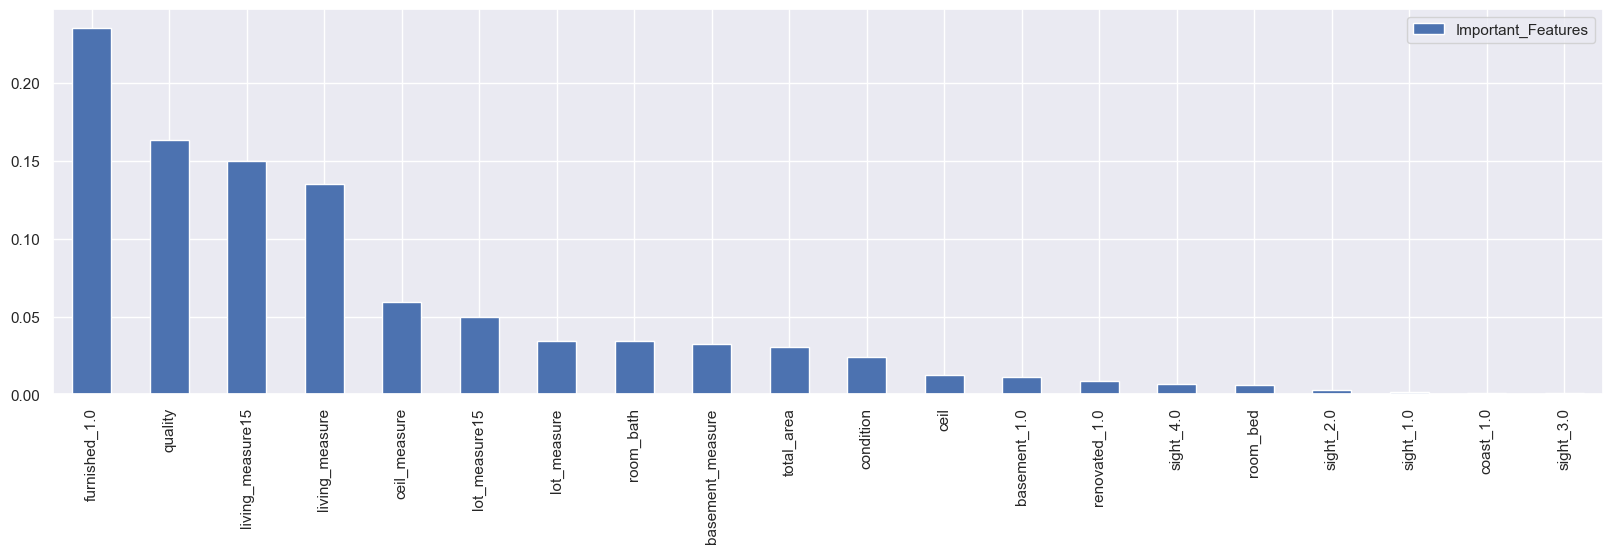

In [207]:
pd.set_option('display.max_rows', 100)
feat_imp(Gradient_Boost_HT,X_train)

In [208]:
#RMSE Model score for each Model in a DataFrame -
print('RMSE on Train Set for Linear Regression Model:',linear_regression_model_RMSE_Train)
print('RMSE on Test Set for Linear Regression Model:',linear_regression_model_RMSE_Test)
print('')
print('RMSE on Train Set for Lasso Regression Model:',Lasso_model_RMSE_Train)
print('RMSE on Test Set for Lasso Regression Model:',Lasso_model_RMSE_Test)
print('')
print('RMSE on Train Set for Ridge Regression Model:',Ridge_model_RMSE_Train)
print('RMSE on Test Set for Ridge Regression Model:',Ridge_model_RMSE_Test)
print('')
print('RMSE on Train Set for KNN Regression Model:',KNN_model_RMSE_Train)
print('RMSE on Test Set for KNN Regression Model:',KNN_model_RMSE_Test)
print('')
print('RMSE on Train Set for Decision Tree Regression Model:',Decision_Tree_model_RMSE_Train)
print('RMSE on Test Set for Decision Tree Regression Model:',Decision_Tree_model_RMSE_Test)
print('')
print('RMSE on Train Set for Random Forest Regression Model:',Random_Forest_model_RMSE_Train)
print('RMSE on Test Set for Random Forest Regression Model:',Random_Forest_model_RMSE_Test)
print('')
print('RMSE on Train Set for Gradient Boost Regression Model:',Gradient_Boost_model_RMSE_Train)
print('RMSE on Test Set for Gradient Boost Regression Model:',Gradient_Boost_model_RMSE_Test)
print('')
print('RMSE on Train Set for Bagging Regression Model:',Bagging_model_RMSE_Train)
print('RMSE on Test Set for Bagging Regression Model:',Bagging_model_RMSE_Test)
print('')
print('RMSE on Train Set for Random Forest Hypertune Model:',Random_Forest_HT_model_RMSE_Train)
print('RMSE on Test Set for Random Forest Hypertune Model:',Random_Forest_HT_model_RMSE_Test)
print('')
print('RMSE on Train Set for Gradient Boost Hypertune Model:',Gradient_Boost_HT_model_RMSE_Train)
print('RMSE on Test Set for Gradient Boost Hypertune Model:',Gradient_Boost_HT_model_RMSE_Test)

RMSE on Train Set for Linear Regression Model: 151475.03626279964
RMSE on Test Set for Linear Regression Model: 148767.85214640148

RMSE on Train Set for Lasso Regression Model: 151475.03737181894
RMSE on Test Set for Lasso Regression Model: 148767.8534244858

RMSE on Train Set for Ridge Regression Model: 151475.04806253308
RMSE on Test Set for Ridge Regression Model: 148767.99038968177

RMSE on Train Set for KNN Regression Model: 155160.69164657124
RMSE on Test Set for KNN Regression Model: 158318.78937111888

RMSE on Train Set for Decision Tree Regression Model: 9439.79972148986
RMSE on Test Set for Decision Tree Regression Model: 7113.899699989042

RMSE on Train Set for Random Forest Regression Model: 113519.96854830768
RMSE on Test Set for Random Forest Regression Model: 114605.30498752225

RMSE on Train Set for Gradient Boost Regression Model: 118224.9289119136
RMSE on Test Set for Gradient Boost Regression Model: 100205.61589751625

RMSE on Train Set for Bagging Regression Model:

In [209]:
#R square Model score for each Model in a DataFrame -
print('R square on Train Set for Linear Regression Model:',linear_regression_model_R_Train)
print('R square on Test Set for Linear Regression Model:',linear_regression_model_R_Test)
print('')
print('R square on Train Set for Lasso Regression Model:',Lasso_model_R_Train)
print('R square on Test Set for Lasso Regression Model:',Lasso_model_R_Test)
print('')
print('R square on Train Set for Ridge Regression Model:',Ridge_model_R_Train)
print('R square on Test Set for Ridge Regression Model:',Ridge_model_R_Test)
print('')
print('R square on Train Set for KNN Regression Model:',KNN_model_R_Train)
print('R square on Test Set for KNN Regression Model:',KNN_model_R_Test)
print('')
print('R square on Train Set for Decision Tree Regression Model:',Decision_Tree_model_R_Train)
print('R square on Test Set for Decision Tree Regression Model:',Decision_Tree_model_R_Test)
print('')
print('R square on Train Set for Random Forest Regression Model:',Random_Forest_model_R_Train)
print('R square on Test Set for Random Forest Regression Model:',Random_Forest_model_R_Test)
print('')
print('R square on Train Set for Gradient Boost Regression Model:',Gradient_Boost_model_R_Train)
print('R square on Test Set for Gradient Boost Regression Model:',Gradient_Boost_model_R_Test)
print('')
print('R square on Train Set for Bagging Regression Model:',Bagging_model_R_Train)
print('R square on Test Set for Bagging Regression Model:',Bagging_model_R_Test)
print('')
print('R square on Train Set for Random Forest Hypertune Model:',Random_Forest_HT_model_R_Train)
print('R square on Test Set for Random Forest Hypertune Model:',Random_Forest_HT_model_R_Test)
print('')
print('R square on Train Set for Gradient Boost Hypertune Model:',Gradient_Boost_HT_model_R_Train)
print('R square on Test Set for Gradient Boost Hypertune Model:',Gradient_Boost_HT_model_R_Test)

R square on Train Set for Linear Regression Model: 0.6327274921696854
R square on Test Set for Linear Regression Model: 0.6438498215105761

R square on Train Set for Lasso Regression Model: 0.6327274867917391
R square on Test Set for Lasso Regression Model: 0.6438491772878034

R square on Train Set for Ridge Regression Model: 0.63272743494946
R square on Test Set for Ridge Regression Model: 0.6438482772455258

R square on Train Set for KNN Regression Model: 0.6146372753881265
R square on Test Set for KNN Regression Model: 0.5809757902794473

R square on Train Set for Decision Tree Regression Model: 0.998573631134239
R square on Test Set for Decision Tree Regression Model: 0.461085210516045

R square on Train Set for Random Forest Regression Model: 0.7937229962755677
R square on Test Set for Random Forest Regression Model: 0.7053112351275233

R square on Train Set for Gradient Boost Regression Model: 0.7762699017843362
R square on Test Set for Gradient Boost Regression Model: 0.71192527

                                                ******************************